In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings("ignore")

## Different Components of a time series data


### Level 

Baseline of the entire series. It is the average of the time series and the baseline to which we add other different components



### Trend 

Indication of whether the time series has move higher or lower or constant (stationary) over the time period 



### Seasonality

A pattern in the time series that repeats after a fixed interval of time (Repeating pattern of a time series)




### Cyclicity

The rise and fall of data that is not of a fixed interval of time (Irregular pattern that does not repeat over time)



### Noise

Random variations in time series. This cannot be used to forecast the future as they do not have any pattern 

In [2]:
data = pd.read_csv("Customers_in_a_Shop.csv", header = None)

data

,0,1
0,1949-01,114.0
1,1949-02,120.0
2,1949-03,134.0
3,1949-04,67.0
4,1949-05,123.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,720.0
142,1960-11,750.0


In [3]:
data.columns = ["Date", "Customers"]

In [4]:
data.head()

,Date,Customers
0,1949-01,114.0
1,1949-02,120.0
2,1949-03,134.0
3,1949-04,67.0
4,1949-05,123.0


In [5]:
data["Date"] = pd.to_datetime(data["Date"], format = "%Y-%m")

In [6]:
data.head()

,Date,Customers
0,1949-01-01,114.0
1,1949-02-01,120.0
2,1949-03-01,134.0
3,1949-04-01,67.0
4,1949-05-01,123.0


In [7]:
data = data.set_index("Date")

In [8]:
data.shape

(144, 1)

In [9]:
data.head()

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0


In [10]:
data.isnull().sum()

Customers    4
dtype: int64

In [11]:
# Visualizing the missing values using a line chart 

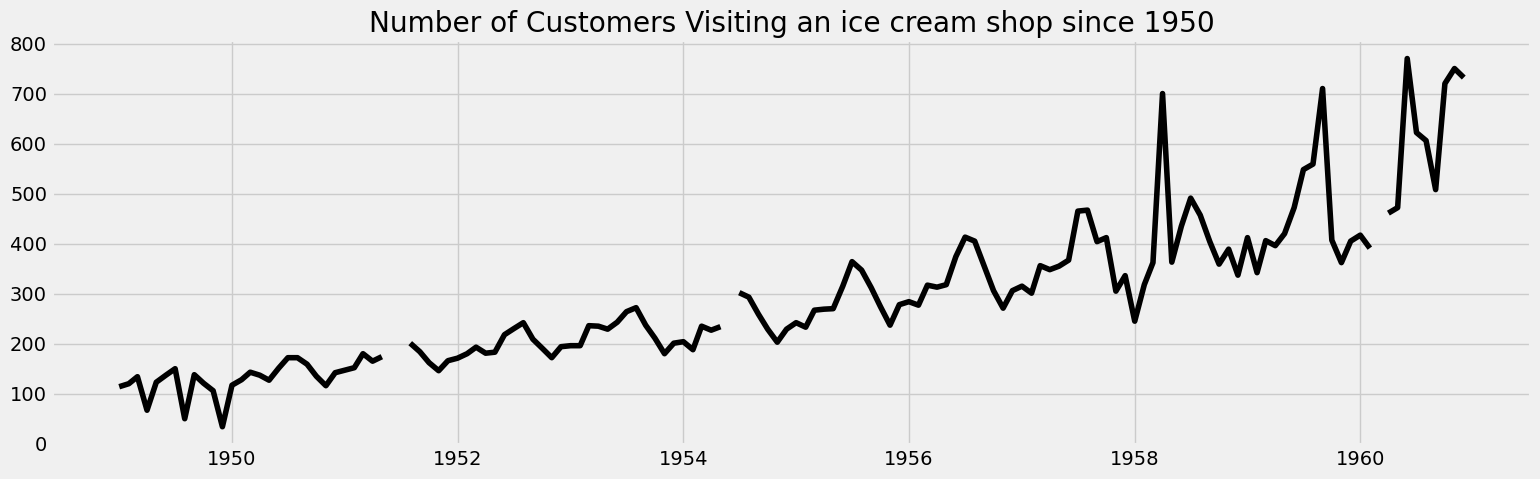

In [12]:
plt.rcParams['figure.figsize'] = (17,5)
plt.plot(data, color = 'black')
plt.title("Number of Customers Visiting an ice cream shop since 1950")
plt.show()

## Missing value imputation 

## Some ways to treat missing values 

- Mean imputation
- Median imputation
- Mode imputation
- Using business logic for imputing missing values 
- Last Observation carried forward 
- Linear Interpolation 
- Seasonal Interpolation

## Mean imputation

Imputation of missing value in a time series data with a mean can distort the seasonality of data and also it won't take into consideration the nature of data

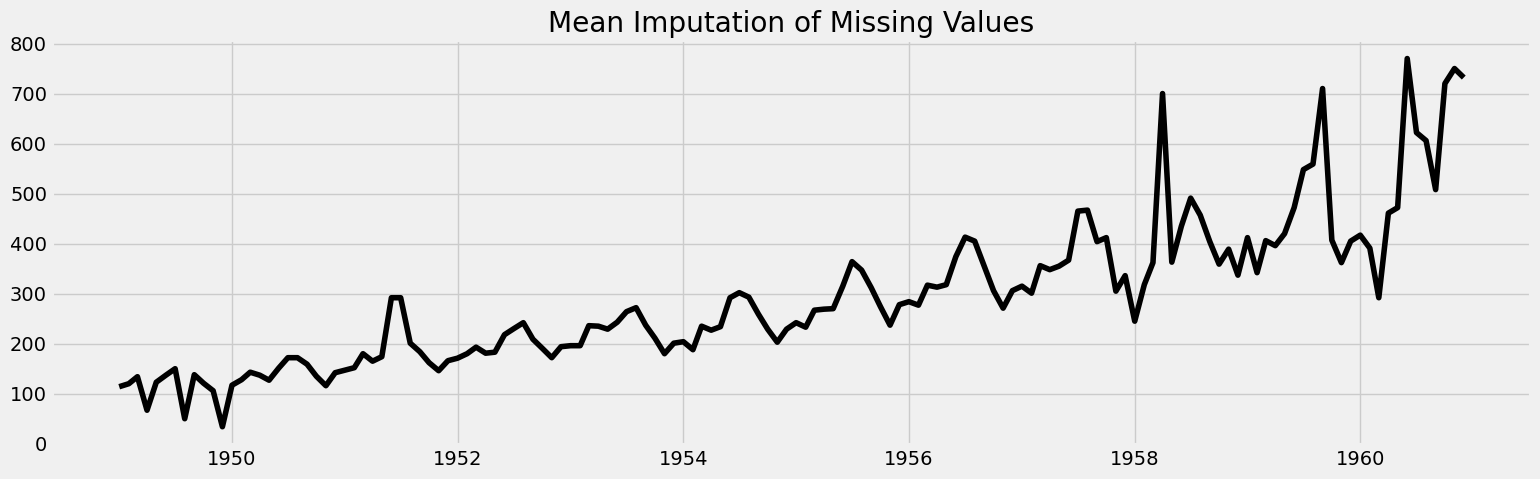

In [13]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_mean'] = data['Customers'].fillna(data['Customers'].mean())
plt.plot(data['Customers_mean'],color='black')
plt.title("Mean Imputation of Missing Values")
plt.show()

## Last observation carried forward

In this method, we impute the missing values with the previous value in the data.

In [14]:
## We use bfill() function to execute this imputation of last observation carried forward 

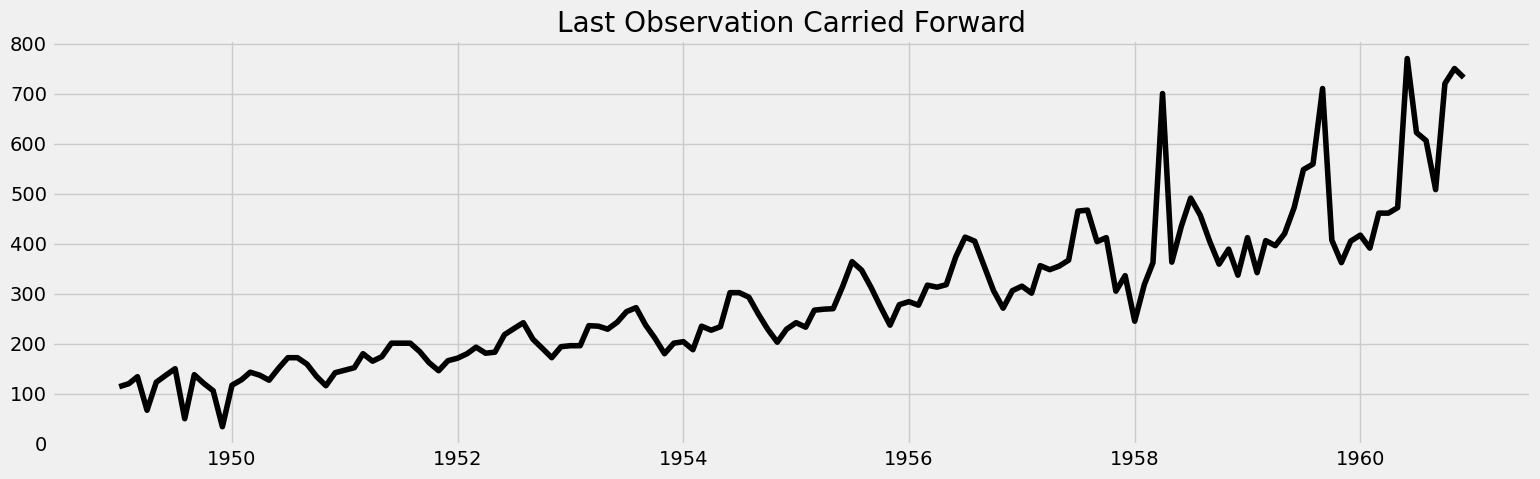

In [15]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_mean'] = data['Customers'].bfill()
plt.plot(data['Customers_mean'],color='black')
plt.title("Last Observation Carried Forward")
plt.show()

## Linear Interpolation

Using Linear Interpolation, we draw a straight line joining the previous and next points of the missing values

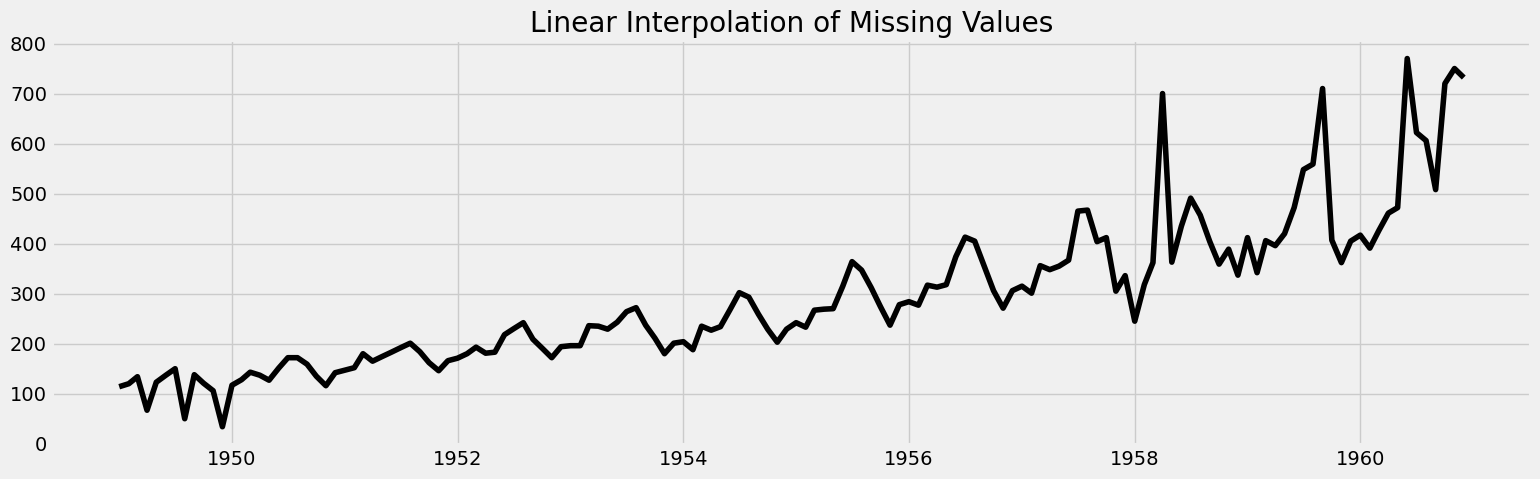

In [16]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_linear']=data['Customers'].interpolate(method='linear')
plt.plot(data['Customers_linear'],color='black')
plt.title("Linear Interpolation of Missing Values")
plt.show()

## Seasonal Interpolation

We impute the missing values with the average of corresponding data points from the previous seasonal data and the next seasonal data

In [17]:
## lets find the dates where we have missing values
data.index[data['Customers'].isnull()]

DatetimeIndex(['1951-06-01', '1951-07-01', '1954-06-01', '1960-03-01'], dtype='datetime64[ns]', name='Date', freq=None)

In [18]:
data.loc['1960-03'].fillna((data['1949-03':'1959-03':12].sum())/data['1949-03':'1959-03':12].shape[0], inplace=True)
data.loc['1954-06'].fillna((data['1949-06':'1953-06':12].sum())/data['1949-06':'1953-06':12].shape[0], inplace=True)
data.loc['1951-07'].fillna((data['1949-07':'1950-07':12].sum())/data.loc['1949-07':'1950-07':12].shape[0], inplace=True)
data.loc['1951-06'].fillna((data['1949-06':'1950-06':12].sum())/data['1949-06':'1950-06':12].shape[0], inplace=True)

In [19]:
data.isnull().sum().sum()

0

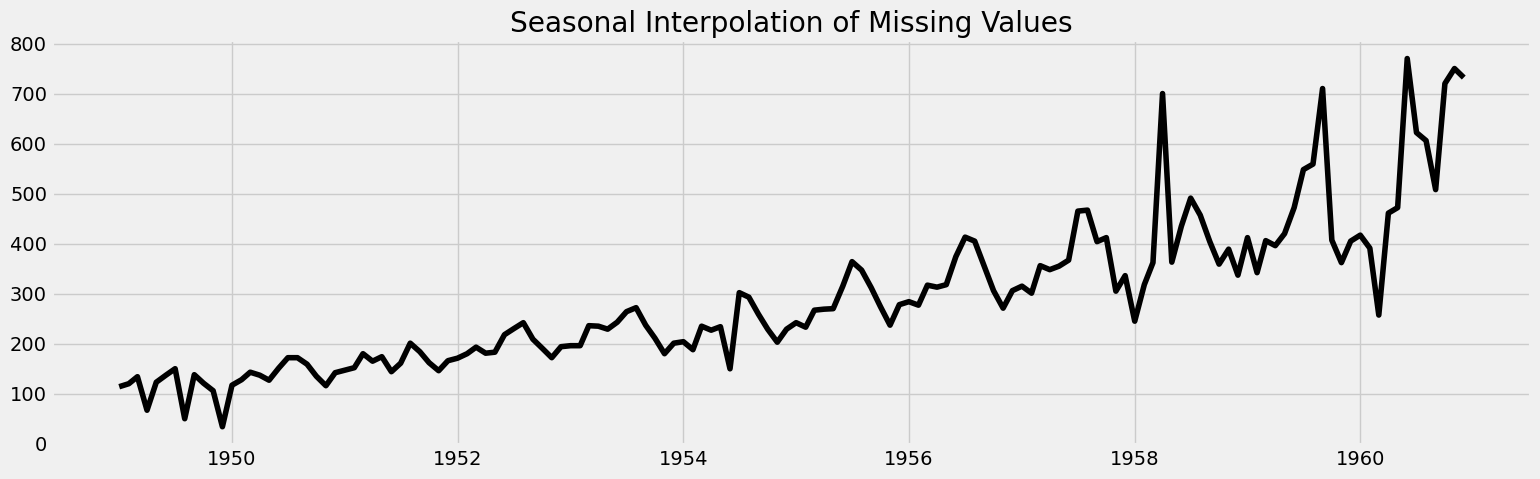

In [20]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data['Customers'],color='black')
plt.title("Seasonal Interpolation of Missing Values")
plt.show()

In [21]:
## We will go with linear interpolation missing value method 

## Outlier Detection

## Reasons for outliers

- Entry errors
- Seasonal errors
- Natural errors 

#### If we feed our predictive model with outliers, then our model will produce the biased results 

#### We use the boxplot to identify the outliers in a time series data

#### A boxplot is a standardized way of displaying the distribution of data 

#### Any data points which are less than Q1 - 1.5 * IQR or greater than Q1 + 1.5 * IQR


#### IQR = Q3 - Q1 


- Q1 = N+1/4 th term 

- Q3 = 3 * N+1/4 th term

<Axes: >

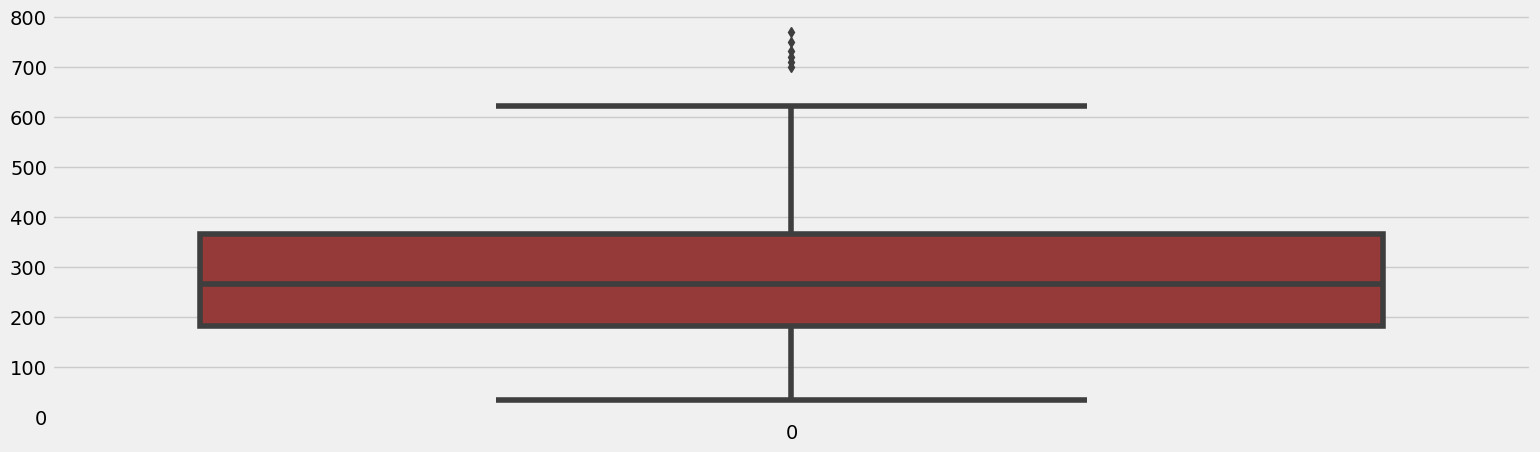

In [22]:
plt.rcParams['figure.figsize']=(17,5)
sns.boxplot(data['Customers_linear'], color='brown')

In [23]:
data['Customers_linear'].max()

770.0

In [24]:
# outliers treatment

data['Customers_linear'].loc[(data['Customers_linear']>=700)] = 622

# lets also check the null values again
data.isnull().sum()

Customers           0
Customers_mean      0
Customers_linear    0
dtype: int64

In [25]:
data["Customers_linear"].max()

622.0

## Capping outliers is one of the methods of handling outliers which helps us replace outliers with a maximum value which we can accept as a normal value

<Axes: >

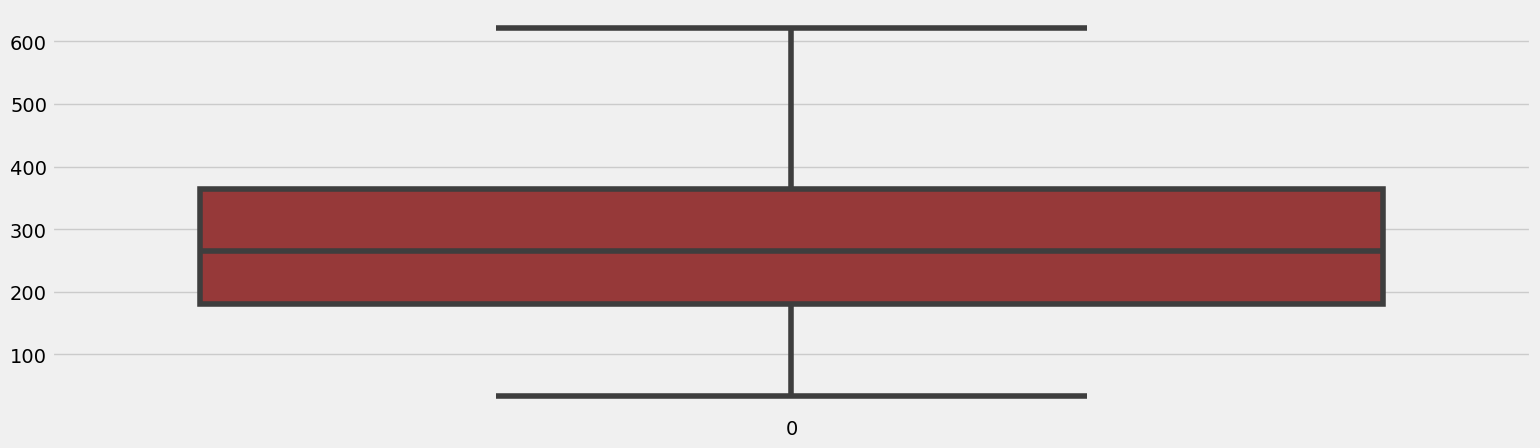

In [26]:
plt.rcParams['figure.figsize']=(17,5)
sns.boxplot(data['Customers_linear'], color='brown')

## Time Series Decomposition 

Time series decomposition is the act of breaking down a time series into fundamental building blocks like level, trend, seasonality, cycility, and noise. Decomposing time series data helps us to find the underlying patterns in the data and help us improve the understanding of the data.  

There are two ways of decomposing a time series data

- Additional Seasonal Decomposition
- Multiplicative Seasonal Decomposition

## Addtitional Seasonal Decomposition

Addtional seasonal decomposition is when we add the individual components to get the time series data

We use additive decomposition when the magnitude of the seasonal fluctuations do not change in relation to time.


y(t) = Level + Trend + Seasonality + Noise + Cyclity 

In [27]:
from pylab import rcParams


In [28]:
import statsmodels.api as sm

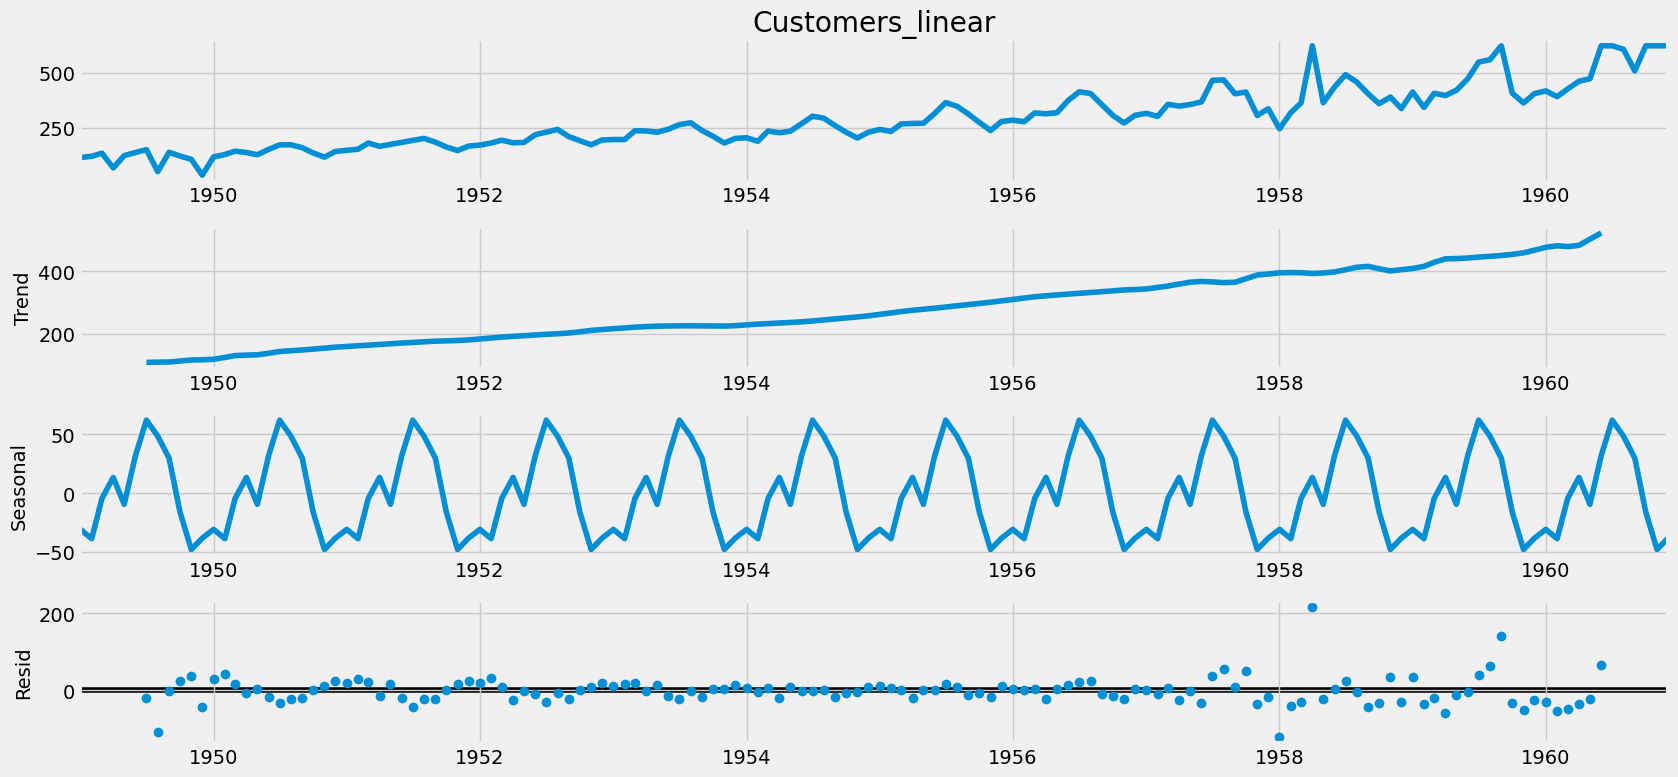

In [29]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(data["Customers_linear"], model = "additive")
decomposition.plot()

plt.show()

### Residual is the leftover part after extracting trend and seasonality from the time series.
### There is an increasing trend in the time series
### There is a fixed pattern in seasonality
### In residual, there is still some pattern in the data from 1949, 1953 and after 1958
### This means we can still do better using another decomposition multiplicative decomposition

## Multiplicative Seasonal decomposition

Multiplicative seasonal decomposition is when we multiply the individual components to get the times series data. 

The multiplicative model is useful when the seasonal variation increases over time.


y(t) = Level * Trend * Seasonality * Cyclicity * Noise

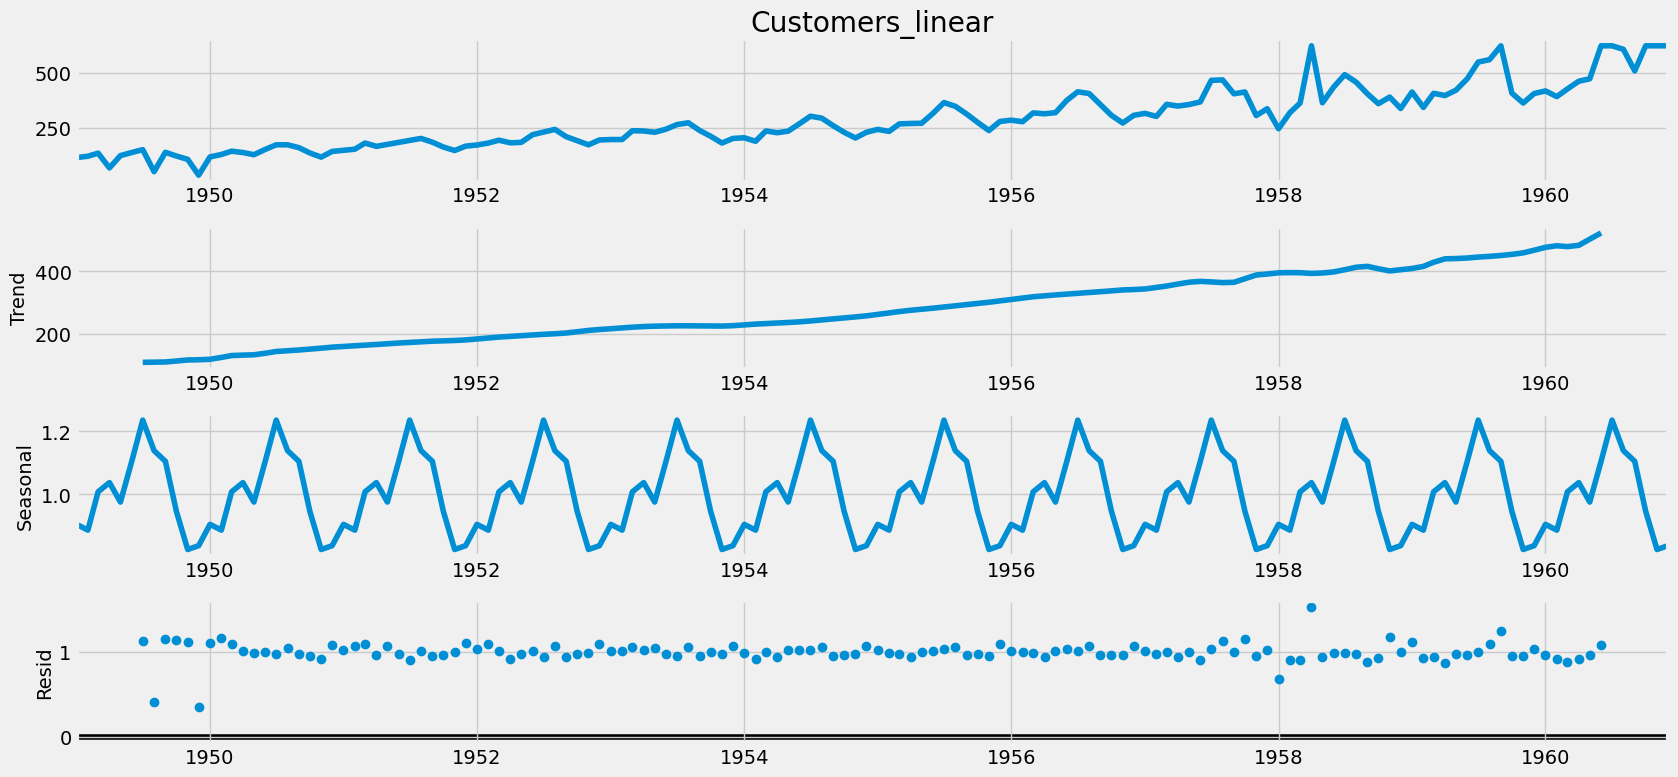

In [30]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(data["Customers_linear"], model = "multiplicative")
decomposition.plot()

plt.show()

### The trends show an increasing nature 
### The seasonality captures the overall data and is almost similar with not too many changes
### But this time there is no specific pattern in the residual part.
### This means everything is captured by the trend and seasonality

# Splitting data into train set and test set 

In machine learning, we split the data into training set and test set randomnly. But in time series as we work with time depenedent data that is organized by time, we cannot use future data to predict the past data. And that is the reason we cannot use a random splitting of a time series data. 

In the time series, the test data must always be the latest data that is produced. Whereas the train data must be the past data available. There are two different types of cross validation techniques in a time series data that we can use for splitting a time series data. 

- One Step validation
- Multi-step validation

In [31]:
data

,Customers,Customers_mean,Customers_linear
Date,,,
1949-01-01,114.0,114.0,114.0
1949-02-01,120.0,120.0,120.0
1949-03-01,134.0,134.0,134.0
1949-04-01,67.0,67.0,67.0
1949-05-01,123.0,123.0,123.0
...,...,...,...
1960-08-01,606.0,606.0,606.0
1960-09-01,508.0,508.0,508.0
1960-10-01,720.0,720.0,622.0


In [32]:
data.drop(["Customers_mean"], axis = 1, inplace = True)

In [33]:
# Lets split first 115 rows as train data and rest as test

length_train = 115

train = data.iloc[:length_train, : ]
test = data.iloc[length_train: , : ]

In [34]:
print(train.shape)

(115, 2)


In [35]:
print(test.shape)

(29, 2)


# Smoothing techniques used for forecasting time series data

Smoothing is the process of removing random variations that appear as coarseness in a plot of raw time series data. It reduces the noise to emphasize the signal that can contain trends and cycles. Analysts also refer to the smoothing process as filtering the data.

Lets look at two basic forecasting methods

- Naive forecasting methods 
- Simple Average method



- #### 1. Naive Forecasting methods 

The naive method is the simplest of all forecasting methods. It looks at the last historical data and extrapolates it for all the future values without adjusting or attempting to establish causal factors. As the name suggests, it is a very naive model and we cannot use it for forecasting. This forecasting shocklingly works in the case of stock prices forecasting because some fluctuations appearing may be completely random so everytime the fluctuations do no follow a systematic pattern


- #### 2. Simple Average Method 

In this method, we take future predictions as the average of all the historical data. This method does not capture any trend or seasonality. 


In [36]:
## Naive forecasting 

y_naive = test.copy()

y_naive["forecasted_naive"] = train["Customers"][length_train - 1]

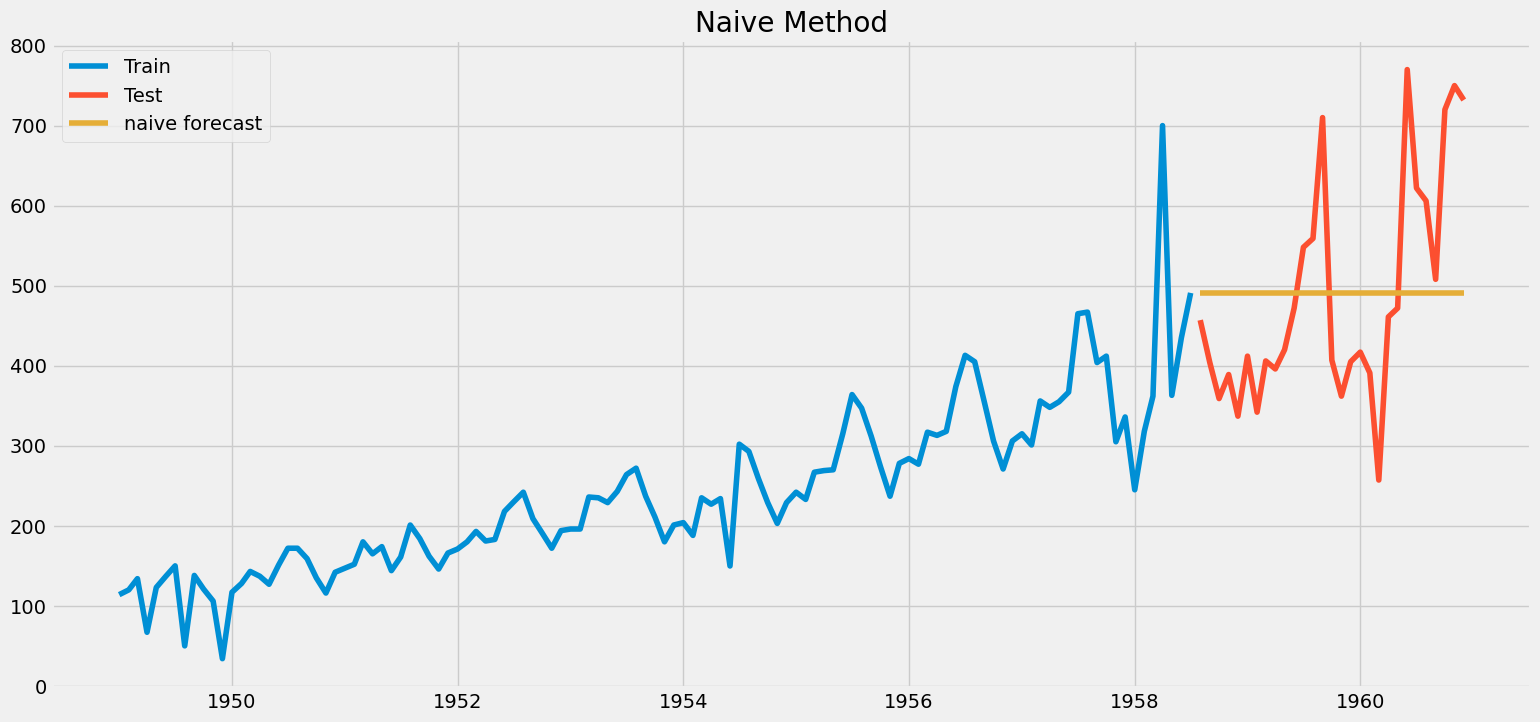

In [37]:
plt.rcParams['figure.figsize'] = (17,8)


plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_naive['forecasted_naive'], label = 'naive forecast')

plt.legend()
plt.title('Naive Method')
plt.show()

## Calculate RMSE and MAPE for the Naive forecasting

In [38]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Customers'], y_naive['forecasted_naive'])).round(2)
mape = np.round(np.mean(np.abs(test['Customers']- y_naive['forecasted_naive'])/test['Customers'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,138.32,24.86


In [39]:
## Simple Average forecasting method 


y_avg = test.copy()

y_avg["forecasted_avg"] = train["Customers"].mean()

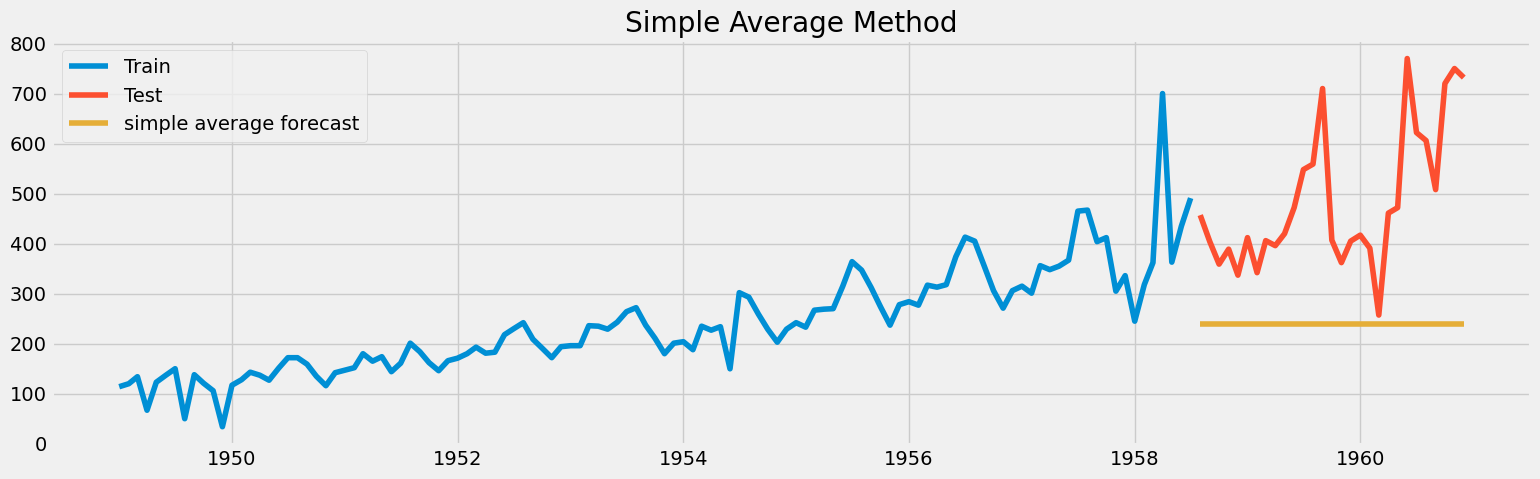

In [40]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_avg['forecasted_avg'], label = 'simple average forecast')

plt.legend()
plt.title('Simple Average Method')
plt.show()

## Calculate RMSE and MAPE for Simple Average Forecasting Method 

In [41]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Customers'], y_avg['forecasted_avg'])).round(2)
mape = np.round(np.mean(np.abs(test['Customers']- y_avg['forecasted_avg'])/test['Customers'])*100,2)

tempresults = pd.DataFrame({'Method':['Simple Average Forecasting Method method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempresults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,138.32,24.86
0,Simple Average Forecasting Method method,282.97,47.03


# Evaluation metrics for time series forecasting

Evaluation metrics are used to prepare the accuracy and efficiency of the time series forecasting. The metrics are

- Mean Forecast Error(MFE)
- Mean Absolute Error(MAE)
- Mean Absolute Percentage Error(MAPE)
- Mean Square Error(MSE) 
- Root Mean Square Error(RMSE)


## Simple Moving Averages 

Simple average method fails to capture any trend or seasonality from the time series data. To overcome this issue, we can take into account only a few of the last historical data because the last few observations have more impact in the future rather than the first observation. That is what the simple moving average method does. 

In this method, we take the future predictions equal to the average of a moving window. A window can be a time period of 3 months, 6 months, 9 months or 1 year.

In [42]:
y_moving = data.copy()

window = 9
y_moving["moving_average_forecast"] = data['Customers'].rolling(window).mean()
y_moving['moving_average_forecast'][length_train:] = y_moving['moving_average_forecast'][length_train-1]

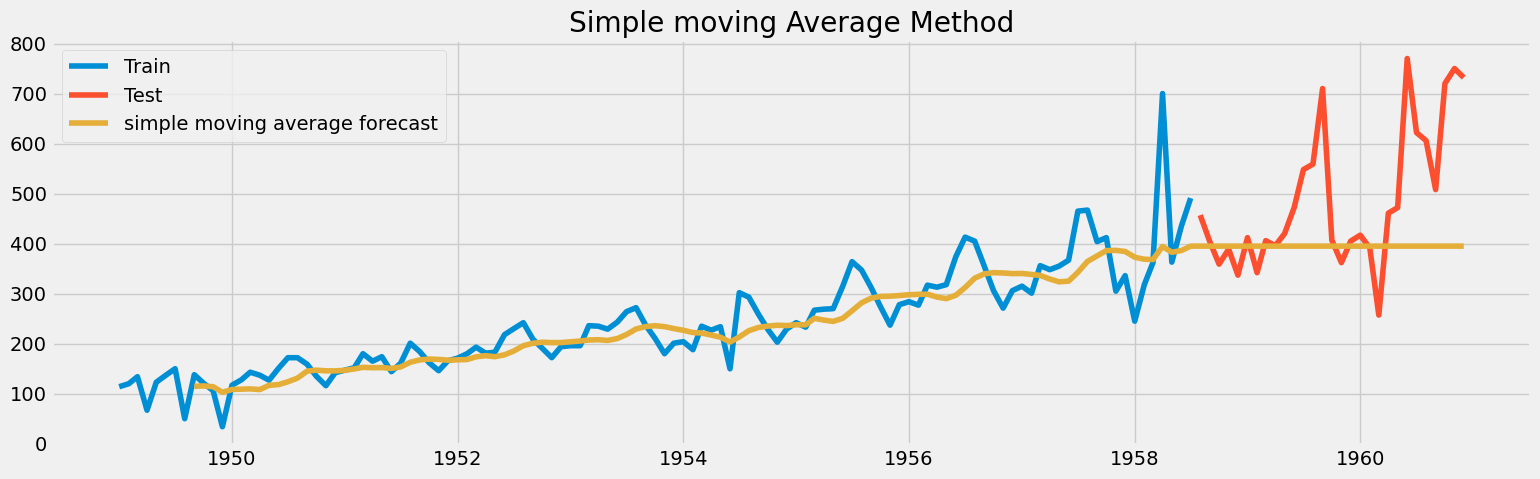

In [43]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_moving['moving_average_forecast'], label = 'simple moving average forecast')

plt.legend()
plt.title('Simple moving Average Method')
plt.show()

We can observe that the forecasted data starts from the tenth month as before that we dont have 9 months data to perform forecasting on the data. Now this method, seems to have captured trend and seasonality. Id we reduce the window size, it may capture more seasonality from the given data. 

## Calculate RMSE and MAPE for Simple Moving Average method 

In [44]:
rmse = np.sqrt(mean_squared_error(test['Customers'], y_moving['moving_average_forecast'][length_train:])).round(2)
mape = np.round(np.mean(np.abs(test['Customers']- y_moving['moving_average_forecast'][length_train:])/test['Customers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,138.32,24.86
0,Simple Average Forecasting Method method,282.97,47.03
0,Simple moving average forecast,165.44,19.89


# Simple Exponential Smoothing 

Shouldn't the most recent observations influence the time series data more than any other observation? This is the main idea of the working behind simple exponential smoothing. In it, more weights are attached to the most recent observations and lesser weights are assigned to the past observations. 


Exponential smoothing is a widely preferred forecasting method for smoothing univariate time series data using the exponential window function. The method works by assigning exponentially decreasing weights for past observations. Larger weights are assigned to more recent observations, while exponentially decreasing weights are assigned as the observations get more and more distant. 

Exponential smoothing assumes that the future will be somewhat the same as the recent past and, therefore, provides forecasts of time-series data based on prior assumptions by the user, such as seasonality or systematic trends. We can use it most effectively to make short-term forecasts when the time series parameters vary slowly over time. 

Simple exponential smoothing captures the level of the time series data. The value of alpha determines the strength of the influence of past recent observations and this alpha is the smoothing parameter. 

In [45]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['Customers'])
model_fit = model.fit(smoothing_level=0.2)
model_fit.params
y_exp = test.copy()
y_exp['Exponential_forecast'] = model_fit.forecast(29)

C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


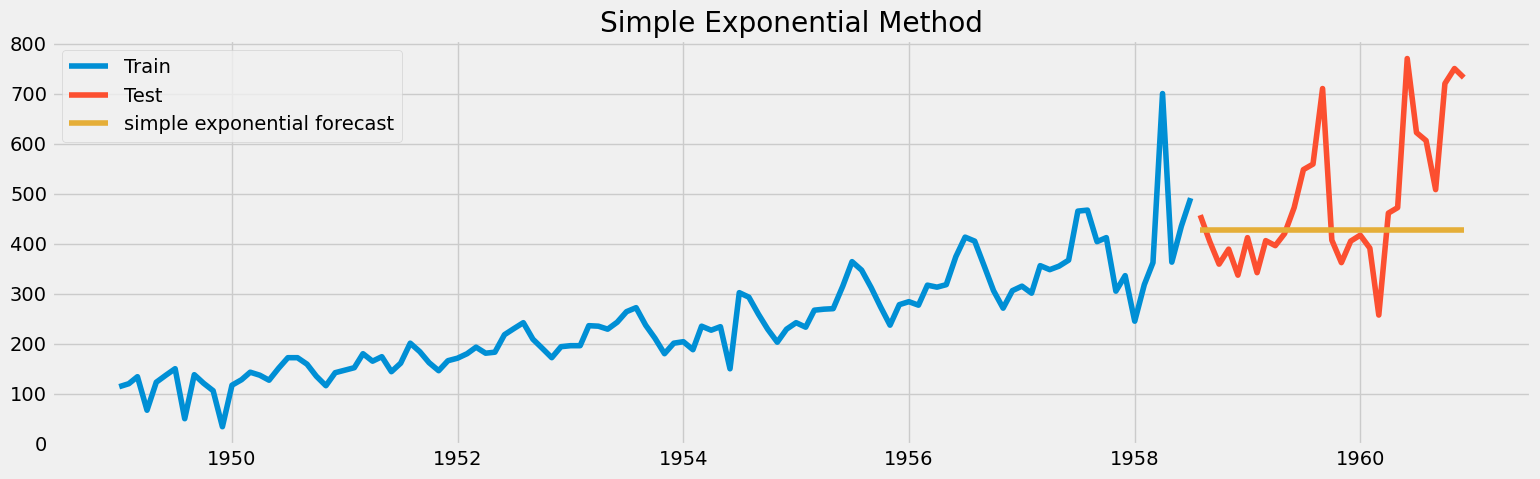

In [46]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_exp['Exponential_forecast'], label = 'simple exponential forecast')

plt.legend()
plt.title('Simple Exponential Method')
plt.show()

In [47]:
y_exp['Exponential_forecast']

Date
1958-08-01    426.509548
1958-09-01    426.509548
1958-10-01    426.509548
1958-11-01    426.509548
1958-12-01    426.509548
1959-01-01    426.509548
1959-02-01    426.509548
1959-03-01    426.509548
1959-04-01    426.509548
1959-05-01    426.509548
1959-06-01    426.509548
1959-07-01    426.509548
1959-08-01    426.509548
1959-09-01    426.509548
1959-10-01    426.509548
1959-11-01    426.509548
1959-12-01    426.509548
1960-01-01    426.509548
1960-02-01    426.509548
1960-03-01    426.509548
1960-04-01    426.509548
1960-05-01    426.509548
1960-06-01    426.509548
1960-07-01    426.509548
1960-08-01    426.509548
1960-09-01    426.509548
1960-10-01    426.509548
1960-11-01    426.509548
1960-12-01    426.509548
Name: Exponential_forecast, dtype: float64

## Calculate RMSE and MAPE for the Simple Exponential Smoothing models

In [48]:
rmse = np.sqrt(mean_squared_error(test['Customers'], y_exp['Exponential_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Customers']- y_exp['Exponential_forecast'])/test['Customers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,138.32,24.86
0,Simple Average Forecasting Method method,282.97,47.03
0,Simple moving average forecast,165.44,19.89
0,Simple exponential smoothing forecast,150.44,19.82


# Holt Exponential Smoothing Model 

Holt’s Exponential Smoothing captures the level and trend of time series in the forecasting.

The forecast equation is a function of both level and trend.

y(t+1) = l(t) +b(t) 

Where l(t) is the level component and b(t) is the trend component.

The trend component is calculated as shown

b(t) = β(l(t) - l(t-1)) + (1-β)b(t-1) 

Here beta is the smoothing parameter for trend.


We capture level and trend in the case of Holt Exponential Smoothing. Whereas, Simple exponential smoothing captures only the trend. 


The Holt-Winters algorithm is a time-series forecasting method that uses exponential smoothing to make predictions based on past observations. The method considers three components of a time series: level, trend, and seasonality, and uses them to make forecasts for future periods.


In [49]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train['Customers'], seasonal_periods=12, trend='multiplicative')
model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.04) # Smoothing level is alpha and Smoothing slope is beta
model_fit.params
y_holtexponential = test.copy()
y_holtexponential['holtexponential_forecast'] = model_fit.forecast(29)

C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [50]:
y_holtexponential['holtexponential_forecast']

Date
1958-08-01    451.887310
1958-09-01    458.393247
1958-10-01    464.992851
1958-11-01    471.687471
1958-12-01    478.478475
1959-01-01    485.367252
1959-02-01    492.355207
1959-03-01    499.443770
1959-04-01    506.634389
1959-05-01    513.928533
1959-06-01    521.327693
1959-07-01    528.833380
1959-08-01    536.447129
1959-09-01    544.170494
1959-10-01    552.005055
1959-11-01    559.952412
1959-12-01    568.014189
1960-01-01    576.192034
1960-02-01    584.487617
1960-03-01    592.902634
1960-04-01    601.438804
1960-05-01    610.097871
1960-06-01    618.881605
1960-07-01    627.791801
1960-08-01    636.830279
1960-09-01    645.998886
1960-10-01    655.299496
1960-11-01    664.734010
1960-12-01    674.304354
Name: holtexponential_forecast, dtype: float64

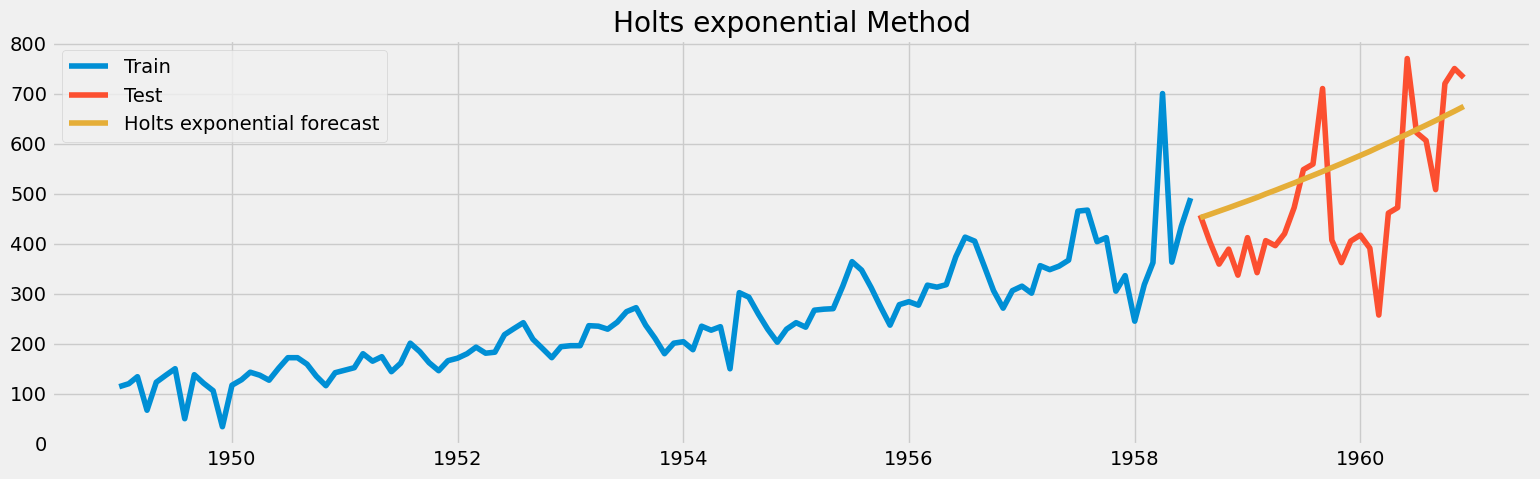

In [51]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_holtexponential['holtexponential_forecast'], label = 'Holts exponential forecast')

plt.legend()
plt.title('Holts exponential Method')
plt.show()

## Calculate RMSE and MAPE for Holt Exponential Smoothing

In [52]:
rmse = np.sqrt(mean_squared_error(test['Customers'], y_holtexponential['holtexponential_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Customers']- y_holtexponential['holtexponential_forecast'])/test['Customers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Exponential Smoothing'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,138.32,24.86
0,Simple Average Forecasting Method method,282.97,47.03
0,Simple moving average forecast,165.44,19.89
0,Simple exponential smoothing forecast,150.44,19.82
0,Holt Exponential Smoothing,129.77,26.67


In [53]:
test["Customers_linear"].describe()

count     29.000000
mean     472.000000
std       99.337448
min      337.000000
25%      404.000000
50%      426.000000
75%      559.000000
max      622.000000
Name: Customers_linear, dtype: float64

## What is the difference between moving average and exponential smoothing?

Moving Average and Exponential Smoothing are two important techniques used for time series forecasting. 

Moving Average is applied to data to filter random noise from it, while Exponential Smoothing applies exponential window function to data. 

Methods under the moving average smoothing process are focused on the values with their timings, while methods under exponential smoothing provide support against trend and seasonality components of time series. The exponential moving average is focused on current values.  

We weigh past observations equally in Moving Average, while Exponential Smoothing assigns exponentially decreasing weights to observations as they age. To put it simply, recent observations are given more weightage in forecasting compared to older observations.   

# Holt Winter Exponential Smoothing
This techniques forecasts based on level, trend and seasonality.



The forecast equation for this method includes seasonality.
	
y(t+1) = l(t)+b(t)+s(t+1-m) 


Here m is the number of time a season repeats in a time period.

In [54]:
model = ExponentialSmoothing(train['Customers'], seasonal_periods=12, trend='multiplicative', seasonal='multiplicative')
model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.04)
model_fit.params
y_holtwinter = test.copy()
y_holtwinter['holtwinter_forecast'] = model_fit.forecast(29)

C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [55]:
y_holtwinter['holtwinter_forecast']

Date
1958-08-01    519.355663
1958-09-01    465.899016
1958-10-01    424.344019
1958-11-01    356.882810
1958-12-01    395.707787
1959-01-01    393.880638
1959-02-01    411.683003
1959-03-01    482.220777
1959-04-01    554.335987
1959-05-01    467.665402
1959-06-01    505.027193
1959-07-01    611.060240
1959-08-01    600.809199
1959-09-01    538.968638
1959-10-01    490.896332
1959-11-01    412.854794
1959-12-01    457.768915
1960-01-01    455.655204
1960-02-01    476.249616
1960-03-01    557.850235
1960-04-01    641.275688
1960-05-01    541.012057
1960-06-01    584.233513
1960-07-01    706.896332
1960-08-01    695.037562
1960-09-01    623.498190
1960-10-01    567.886427
1960-11-01    477.605186
1960-12-01    529.563447
Name: holtwinter_forecast, dtype: float64

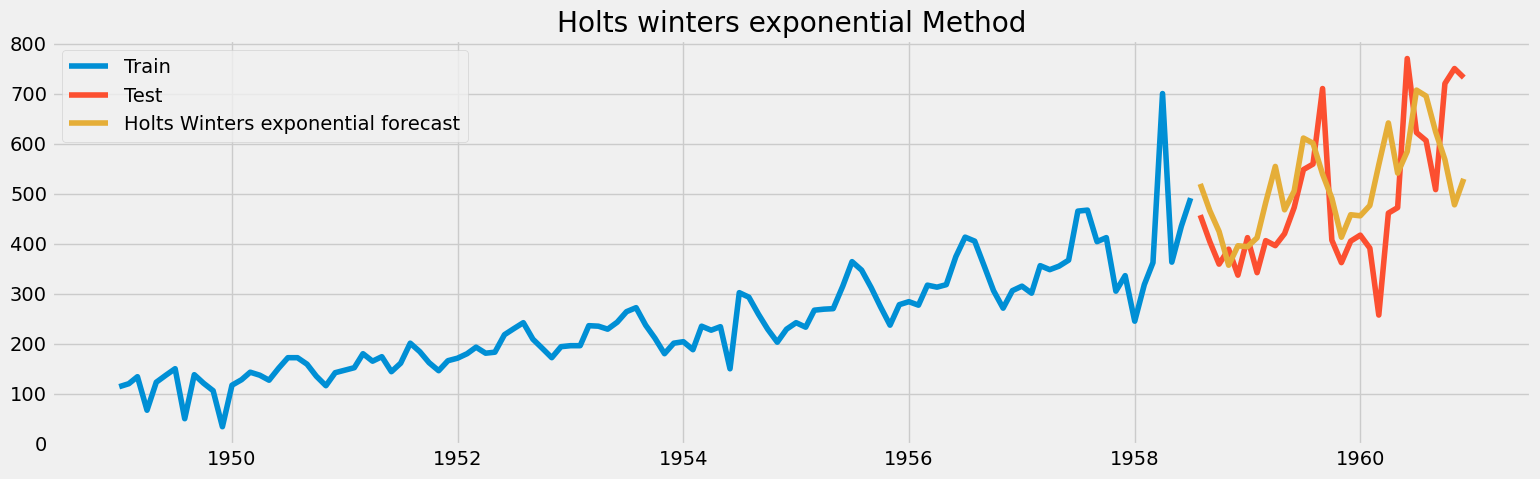

In [56]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_holtwinter['holtwinter_forecast'], label = 'Holts Winters exponential forecast')

plt.legend()
plt.title('Holts winters exponential Method')
plt.show()

## Calculate RMSE and MAPE for Holt Winter's exponential smoothing

In [57]:
rmse = np.sqrt(mean_squared_error(test['Customers'], y_holtwinter['holtwinter_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Customers']- y_holtwinter['holtwinter_forecast'])/test['Customers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters Exponential Smoothing'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,138.32,24.86
0,Simple Average Forecasting Method method,282.97,47.03
0,Simple moving average forecast,165.44,19.89
0,Simple exponential smoothing forecast,150.44,19.82
0,Holt Exponential Smoothing,129.77,26.67
0,Holt Winters Exponential Smoothing,123.32,21.64


# Stationarity
Stationarity means that the statistical properties of a process generating a time series do not change over time. The statistical properties are Mean, variance and covariance which are same irrespective of the time at which you observe them.

Stationarity is an important concept as stationary processes are easier to analyze and model because their statistical properties do not change over time.

In [58]:
#getting statistical information
data.describe()

,Customers,Customers_linear
count,144.000000,144.000000
mean,288.715152,286.680556
std,149.314034,136.456487
min,34.000000,34.000000
25%,178.500000,180.750000
50%,258.090909,265.500000
75%,363.250000,364.750000
max,770.000000,622.000000


# Augmented Dickey-Fuller Test for Stationarity
Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.

* Null Hypothesis (H0):  The time series is not stationary.

* Alternate Hypothesis (H1): The time series is stationary.


--------------------------------------------------------------------------------------------------------------------------------

* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [59]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Customers_linear'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: 2.710560011283291
n_lags: 14
p-value: 0.9990875034273379
Critial Values:
   1%, -3.482087964046026
Critial Values:
   5%, -2.8842185101614626
Critial Values:
   10%, -2.578864381347275


In [60]:
result

(2.710560011283291,
 0.9990875034273379,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1339.8797843138855)

* p-value is 1 and its value is larger than 0.05 , hence 
it fails to reject the null hypothesis. Hence, the data has a unit root and is non-stationary

* The mean value is not stationary.
* The variance is fluctating over time.

# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root. A stationary time series is one where statistical properties — like the mean and variance — are constant over time.

* Null Hypothesis: The time series is stationary.

* Alternate Hypothesis: The time series is not stationary.

--------------------------------------------------------------------------------------------------------------------------------

For KPSS test,

* The Null Hypothesis : The series is stationary when p-value >0.05

* Alternate Hypothesis: The series is not stationary when p-value <= 0.05

In [61]:
#loading kpss from statsmodel
from statsmodels.tsa.stattools import kpss

result = kpss(data['Customers_linear'])
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print('Critial Values:')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

KPSS Statistic: 1.6536982710203008
p-value: 0.01
num lags: 8
Critial Values:
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


#### As p-value is 0.01 that is less than 0.05, we fail to reject the null hypothesis. And hence, we conclude that the series is not stationary

#### As the series is non-stationary from both the tests, we conclude that the time series is non-stationary

# Non-Stationary Series to Stationary Series
There are two tools for converting a non-stationary series into a stationary series.

1)	Differencing

2)	Transformation

Differencing tool is used to make the mean constant for a time series. That means it removes the trend from the series. 

Differencing means to calculate the difference between consecutive observations. Differencing stabilises the mean of the time series by removing the trend from the series.


The mathematical formula for box cox transformation is shown 


The procedure is to find the optimal value of lambda between -5 and +5 to minimize the variance of the time series.

## Box Cox Transformation
A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn't normal, applying a Box-Cox means that you are able to run a broader number of tests.

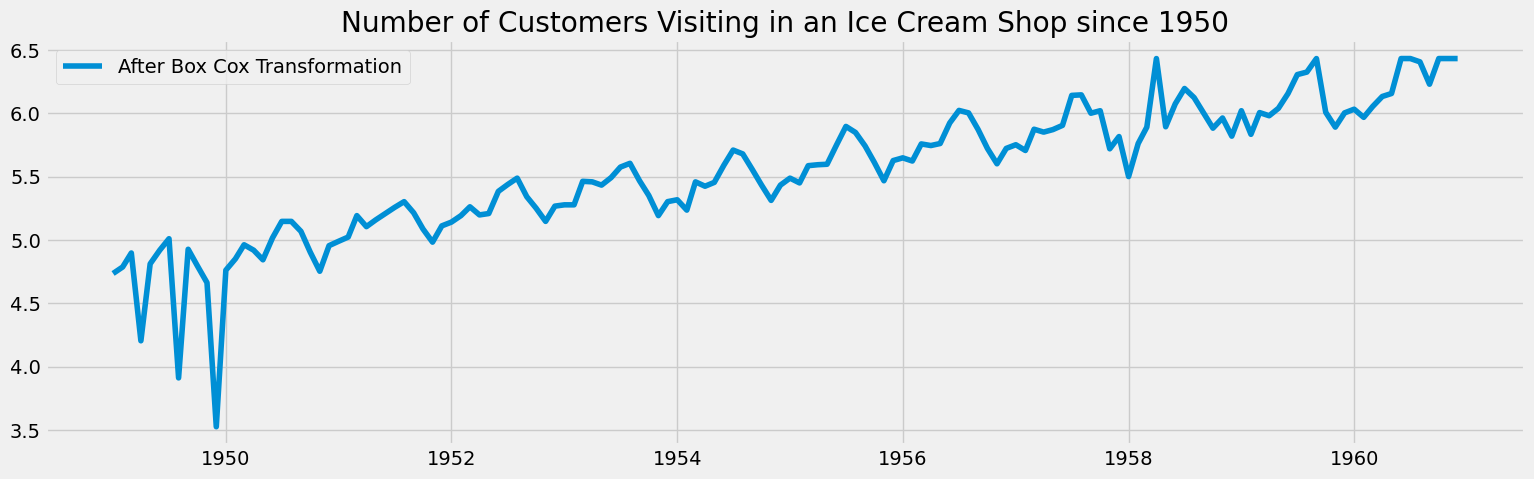

In [62]:
from scipy.stats import boxcox

data_boxcox = pd.Series(boxcox(data['Customers_linear'],lmbda=0),index=data.index)
plt.plot(data_boxcox, label="After Box Cox Transformation")
plt.legend()
plt.title("Number of Customers Visiting in an Ice Cream Shop since 1950")
plt.show()

## Differencing

Differencing stabilises the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality. 


The shift function shifts the time series data and we get the difference between the consecutive observations. This makes the trend constant. 

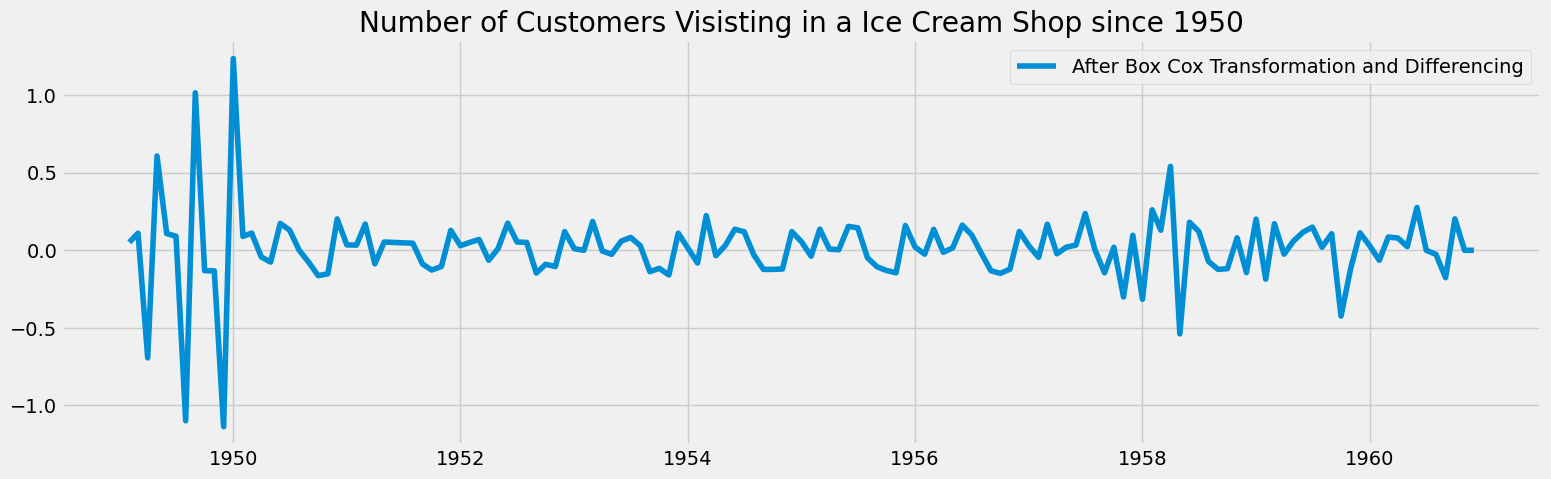

In [63]:
data_boxcox_difference= pd.Series(data_boxcox - data_boxcox.shift(), index=data.index)
data_boxcox_difference.dropna(inplace=True)
plt.plot(data_boxcox_difference, label="After Box Cox Transformation and Differencing")
plt.legend()
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()

## ADF Test

Checking stationary after transformation

In [64]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_boxcox_difference, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]:.20f}')
print(f'p-value: {result[1]:.20f}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -11.770270241136188
n_lags: 0.00000000000000000000
p-value: 0.00000000000000000000
Critial Values:
   1%, -3.4808880719210005
Critial Values:
   5%, -2.8836966192225284
Critial Values:
   10%, -2.5785857598714417


## KPSS Test
Checking stationarity after transformation using KPSS

In [65]:
from statsmodels.tsa.stattools import kpss
result = kpss(data_boxcox_difference)
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print('Critial Values:')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

KPSS Statistic: 0.10183891383097167
p-value: 0.1
num lags: 22
Critial Values:
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


## Auto Correleation Function (ACF)
ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. 

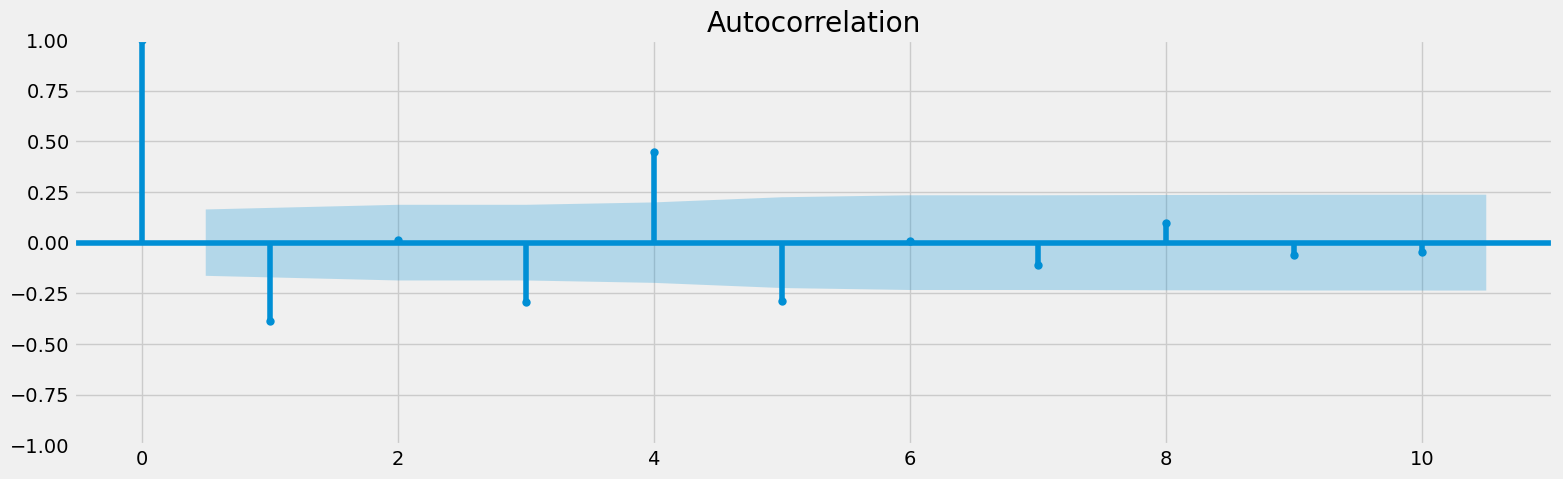

In [66]:
#Loading and plotting acf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_boxcox_difference, ax=plt.gca(), lags=10)
plt.show()

#### There are four correlations that are higher than this blue band which means they are all signficant and the remaining that are within the blue band are not so significant

## Partial Auto Correleation Function (PACF)
Partial autocorrelation function (PACF) gives the partial correlation of a stationary time series with its own lagged values, regressed the values of the time series at all shorter lags. It contrasts with the autocorrelation function, which does not control for other lags.

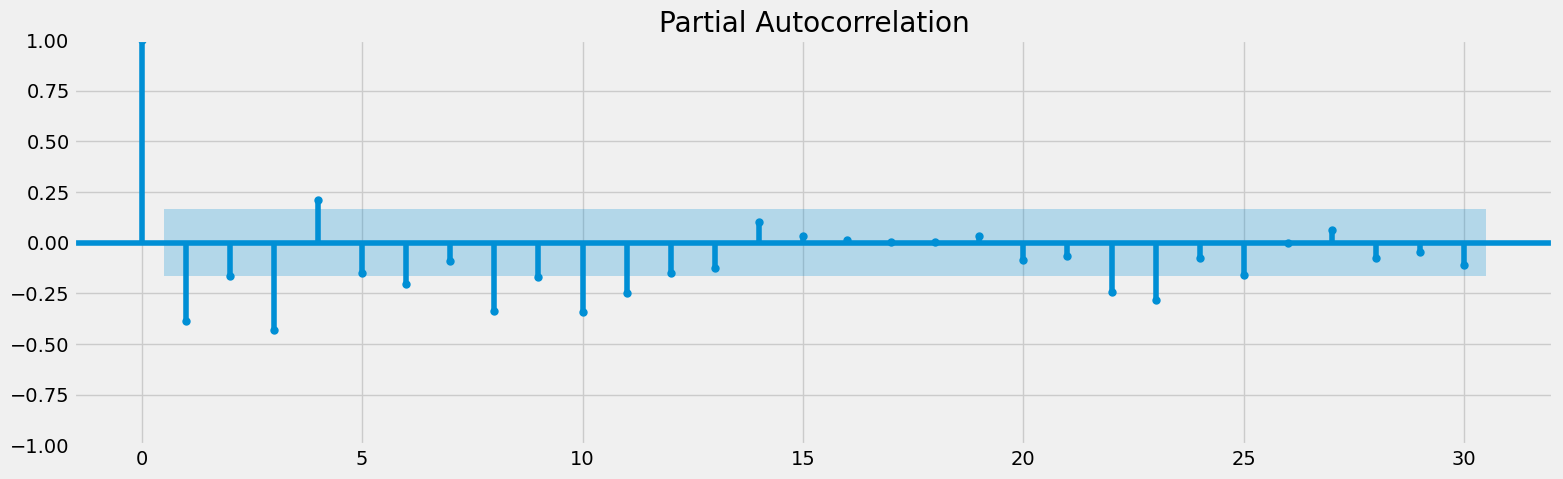

In [67]:
#Loading and plottin pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_boxcox_difference, ax=plt.gca(), lags=30)
plt.show()

#### There are 9 such partial correlations that are significant in our time series

## Splitting the Train and Test data

In [68]:
length_train = 115

train_data_boxcox = data_boxcox[:length_train]
test_data_boxcox = data_boxcox[length_train:]
train_data_boxcox_difference = data_boxcox_difference[:length_train-1]
test_data_boxcox_difference = data_boxcox_difference[length_train-1:]

# Auto Regressive Model
Regressive model is forecasting the future observations as a linear regression of one or more past observations.

This model has a parameter called “p” which is the lag order p that means p is the maximum number of lags that we consider in order to forecast the future observations.

Autoregressive model equation would be

y(t) = β_0 + β_1 y(t-2) + β_2 y(t-4) + β_3 y(t-6)

Our first step would be to plot the partial autocorrelation function (PACF) and check for the past observations that actually influence the model. After that we have to find out the those past observations that have correlations with the future observations.

The PACF generated variables will be used to build a model similar to a linear regression model. 

In [69]:
from statsmodels.tsa.arima.model import ARIMA

model_ar = ARIMA(train_data_boxcox_difference, order=(1,0,0))
model_fit = model_ar.fit()
print(model_fit.params)

const     0.012435
ar.L1    -0.398531
sigma2    0.058090
dtype: float64


C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Recover Original Time Series

In [70]:
y_ar_new = data_boxcox_difference.copy()
y_ar_new['ar_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                              data_boxcox_difference.index.max())

y_ar_new['ar_forecast_boxcox'] = y_ar_new['ar_forecast_boxcox_difference'].cumsum()
y_ar_new['ar_forecast_boxcox'] = y_ar_new['ar_forecast_boxcox'].add(data_boxcox[0])
y_ar_new['ar_forecast'] = np.exp(y_ar_new['ar_forecast_boxcox'])

In [71]:
y_ar_new['ar_forecast']

1949-02-01    115.426486
1949-03-01    115.074891
1949-04-01    112.055836
1949-05-01    150.299404
1949-06-01    120.050948
                 ...    
1960-08-01    639.109946
1960-09-01    647.107149
1960-10-01    655.204422
1960-11-01    663.403016
1960-12-01    671.704199
Freq: MS, Name: predicted_mean, Length: 143, dtype: float64

## Plotting Train, Test and Forecast

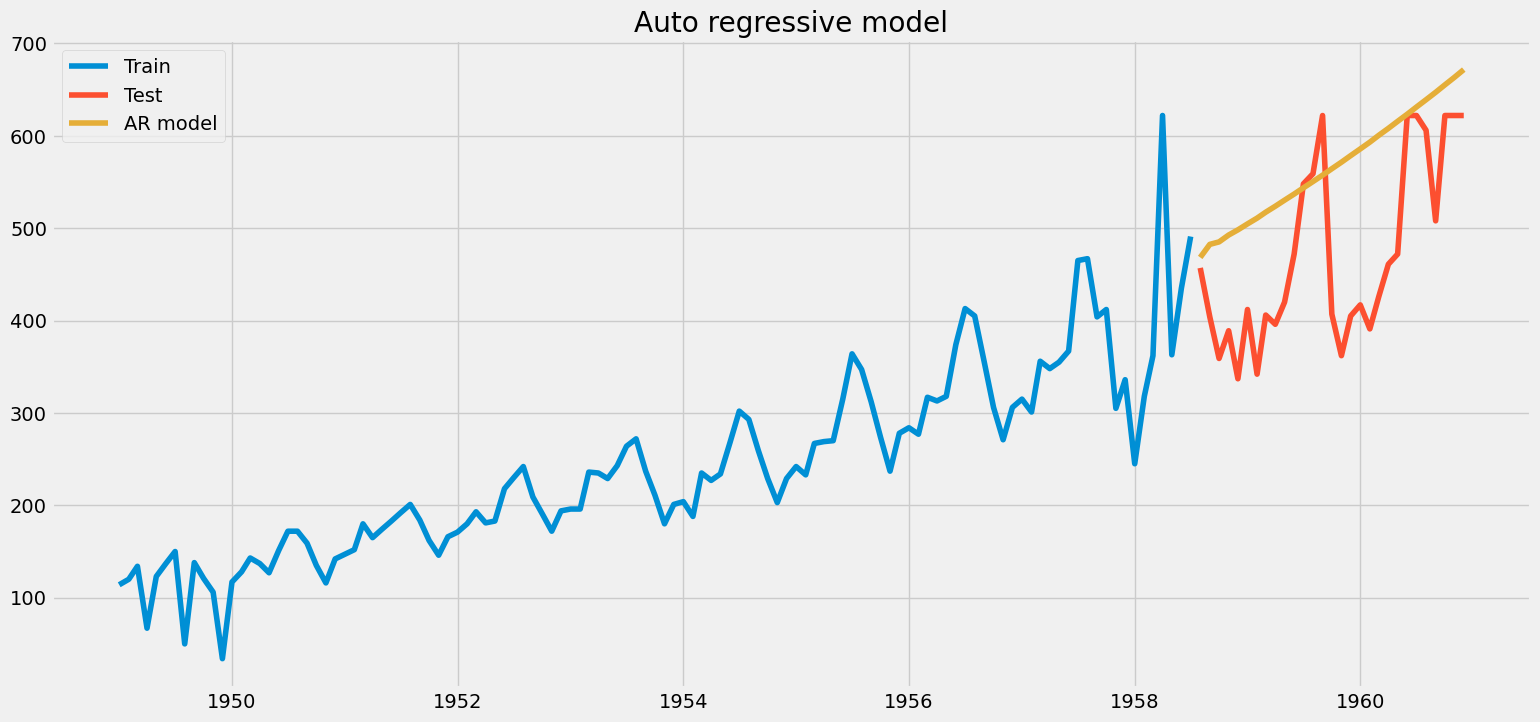

In [72]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_ar_new['ar_forecast'][test.index.min():], label = 'AR model')

plt.legend()
plt.title('Auto regressive model')
plt.show()

Although it is not capturing the seasonality from the time series, it is capturing the trend very well

# Moving Average Method
In Moving Average Model, we consider the past forecasted errors to forecast the future values.

The moving average model has a parameter called “q” which is the size of the moving average window over which linear combinations of errors are calculated.

The mathematical equation is:-

y(t) = µ + φ(k)*ε(t-k)

µ is the mean of the series

ε(t-k) is the past forecasted value

φ(k) is the weight associated with error value

In [73]:
#from statsmodels.tsa.arima_model import ARIMA

model_ma = ARIMA(train_data_boxcox_difference, order=(0,0,7))
model_fit = model_ma.fit()
print(model_fit.params)

C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


const     0.012469
ma.L1    -0.493988
ma.L2    -0.208827
ma.L3    -0.212490
ma.L4     0.570620
ma.L5    -0.290534
ma.L6    -0.118644
ma.L7    -0.221038
sigma2    0.034790
dtype: float64


C:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Recover Original Series

In [74]:
y_ma_new = data_boxcox_difference.copy()
y_ma_new['ma_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                              data_boxcox_difference.index.max())
y_ma_new['ma_forecast_boxcox'] = y_ma_new['ma_forecast_boxcox_difference'].cumsum()
y_ma_new['ma_forecast_boxcox'] = y_ma_new['ma_forecast_boxcox'].add(data_boxcox[0])
y_ma_new['ma_forecast'] = np.exp(y_ma_new['ma_forecast_boxcox'])

In [75]:
data_boxcox_difference.index.min()

Timestamp('1949-02-01 00:00:00')

In [76]:
y_ma_new['ma_forecast']

1949-02-01    115.430343
1949-03-01    115.448039
1949-04-01    111.646187
1949-05-01    150.340124
1949-06-01    145.838459
                 ...    
1960-08-01    517.819945
1960-09-01    524.316963
1960-10-01    530.895499
1960-11-01    537.556576
1960-12-01    544.301227
Freq: MS, Name: predicted_mean, Length: 143, dtype: float64

## Plotting Train, Test and Forecast

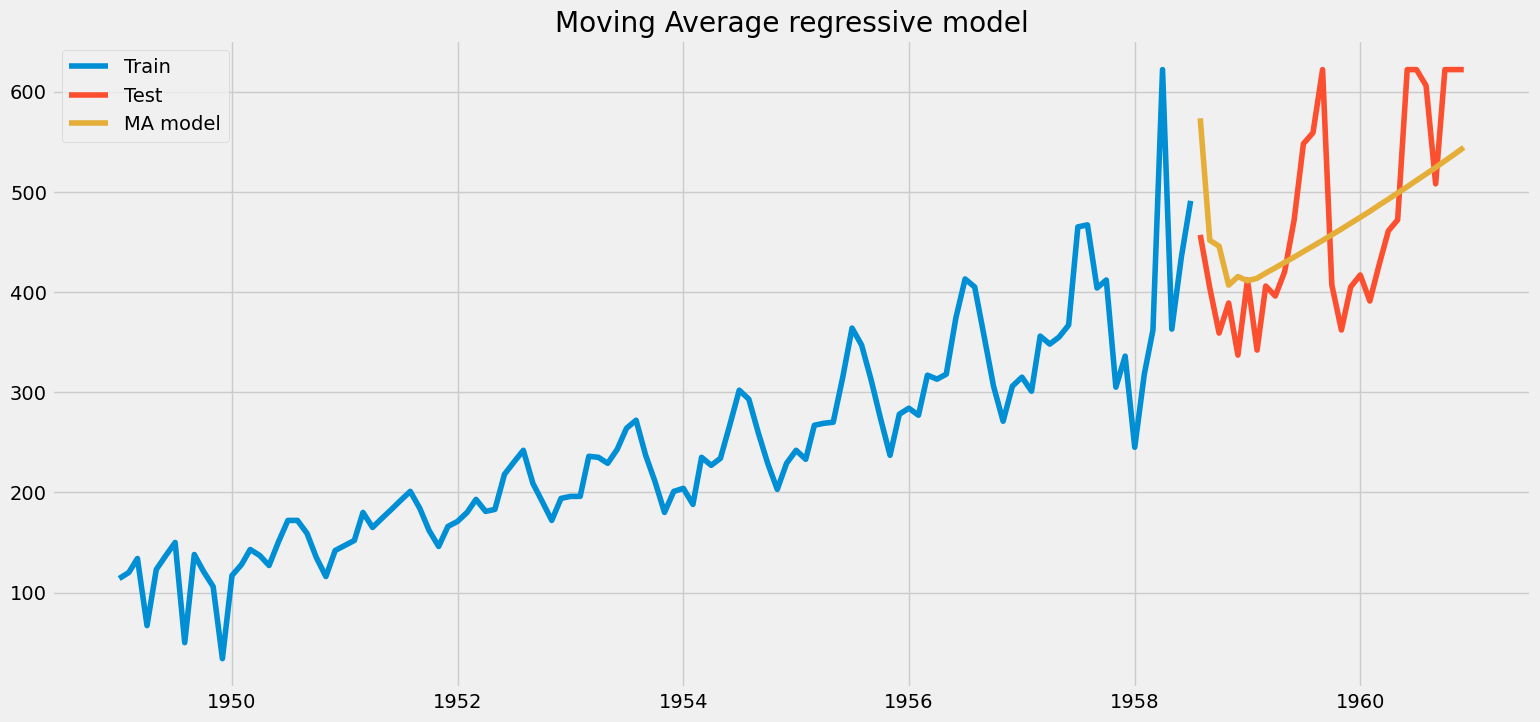

In [77]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_ma_new['ma_forecast'][test.index.min():], label = 'MA model')

plt.legend()
plt.title('Moving Average regressive model')
plt.show()

## Splitting the train data and test data

In [78]:
length_train = 115
train = data.iloc[:length_train,:]
test=data.iloc[length_train:,:]

In [79]:
train_data_boxcox = data_boxcox[:length_train]
test_data_boxcox = data_boxcox[length_train:]
train_data_boxcox_difference = data_boxcox_difference[:length_train-1]
test_data_boxcox_difference = data_boxcox_difference[length_train-1:]  

# Auto Regressive Moving Average Model (ARMA)
ARMA Model combines both AR and MA model.

It takes into account one or more past observations as well as the past errors.

The ARMA model contains two parameters p and q

p is the highest lag in the time series

q is the number of past errors included
  

In [80]:
from statsmodels.tsa.arima.model import ARIMA

model_arma = ARIMA(train_data_boxcox_difference, order=(1,0,5))
model_fit = model_arma.fit()
print(model_fit.params)

C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


const     0.012084
ar.L1    -0.242827
ma.L1    -0.355864
ma.L2    -0.417580
ma.L3    -0.247358
ma.L4     0.360207
ma.L5    -0.333447
sigma2    0.034310
dtype: float64


C:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Recover Original Time Series Data

In [81]:
y_arma_new = data_boxcox_difference.copy()
y_arma_new['arma_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                                  data_boxcox_difference.index.max())
y_arma_new['arma_forecast_boxcox'] = y_arma_new['arma_forecast_boxcox_difference'].cumsum()
y_arma_new['arma_forecast_boxcox'] = y_arma_new['arma_forecast_boxcox'].add(data_boxcox[0])
y_arma_new['arma_forecast'] = np.exp(y_arma_new['arma_forecast_boxcox'])

# Plotting Train, Test and Forecast

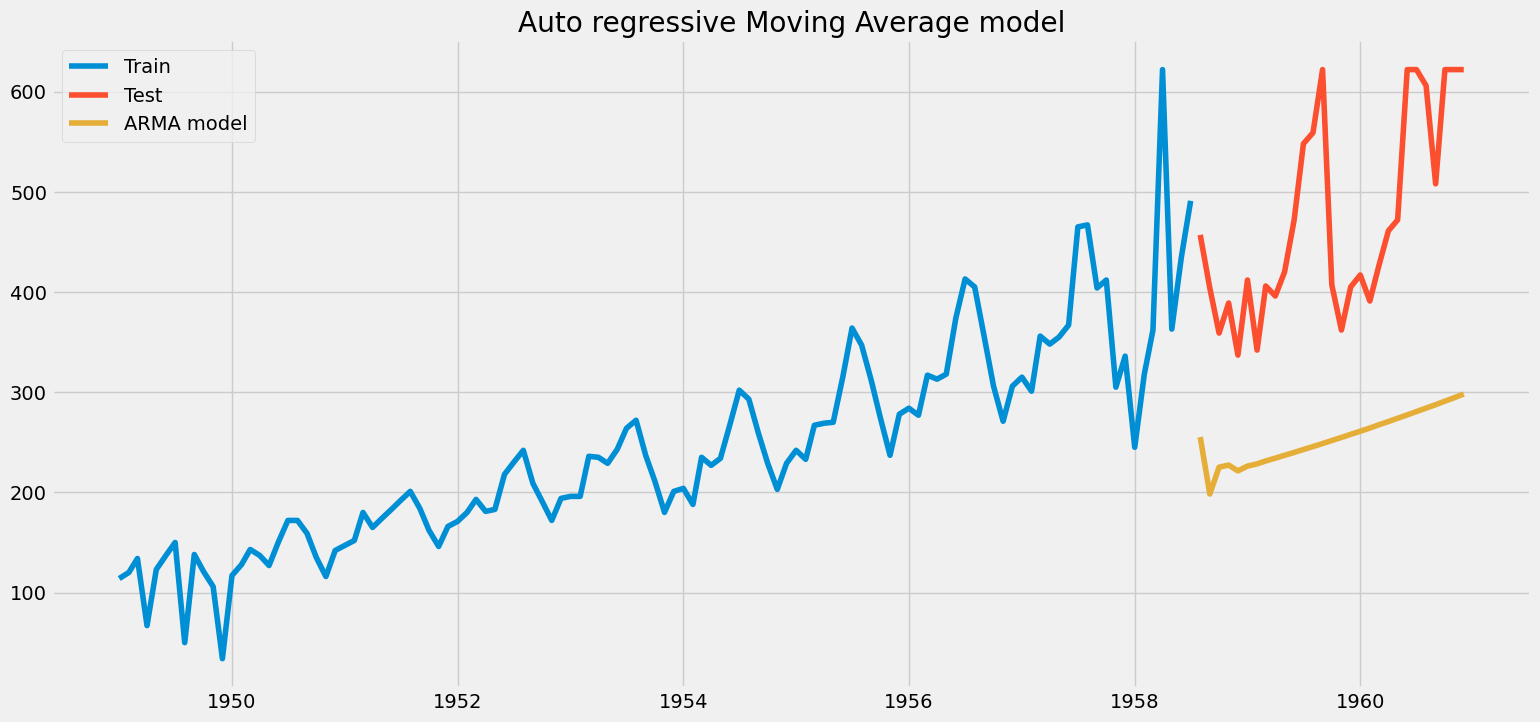

In [82]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_arma_new['arma_forecast'][test.index.min():], label = 'ARMA model')

plt.legend()
plt.title('Auto regressive Moving Average model')
plt.show()

In [83]:
## ARMA Model captured the trend but not the seasonality

# Auto Regressive Integrated Moving Average Model (ARIMA)

It transform the time series using Box Cox and then itself takes care of the differencing and remove the trend from the time series.

We have three parameters to be used:-

p is the highest lag in the model

d is the degree of differencing to make the series stationary

q is the number of past errors terms included

# AR - PACF (We get AR Values from PACF)

# MA - ACF (We get MA values from ACF)

In [84]:
data

,Customers,Customers_linear
Date,,
1949-01-01,114.0,114.0
1949-02-01,120.0,120.0
1949-03-01,134.0,134.0
1949-04-01,67.0,67.0
1949-05-01,123.0,123.0
...,...,...
1960-08-01,606.0,606.0
1960-09-01,508.0,508.0
1960-10-01,720.0,622.0


In [85]:
data.isnull().sum()

Customers           0
Customers_linear    0
dtype: int64

In [86]:
data

,Customers,Customers_linear
Date,,
1949-01-01,114.0,114.0
1949-02-01,120.0,120.0
1949-03-01,134.0,134.0
1949-04-01,67.0,67.0
1949-05-01,123.0,123.0
...,...,...
1960-08-01,606.0,606.0
1960-09-01,508.0,508.0
1960-10-01,720.0,622.0


In [87]:
# Lets split first 115 rows as train data and rest as test

length_train = 115

train = data.iloc[:length_train, : ]
test = data.iloc[length_train: , : ]

In [88]:
train

,Customers,Customers_linear
Date,,
1949-01-01,114.0,114.0
1949-02-01,120.0,120.0
1949-03-01,134.0,134.0
1949-04-01,67.0,67.0
1949-05-01,123.0,123.0
...,...,...
1958-03-01,362.0,362.0
1958-04-01,700.0,622.0
1958-05-01,363.0,363.0


# Lag plots (How does Lag plot look for this data)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

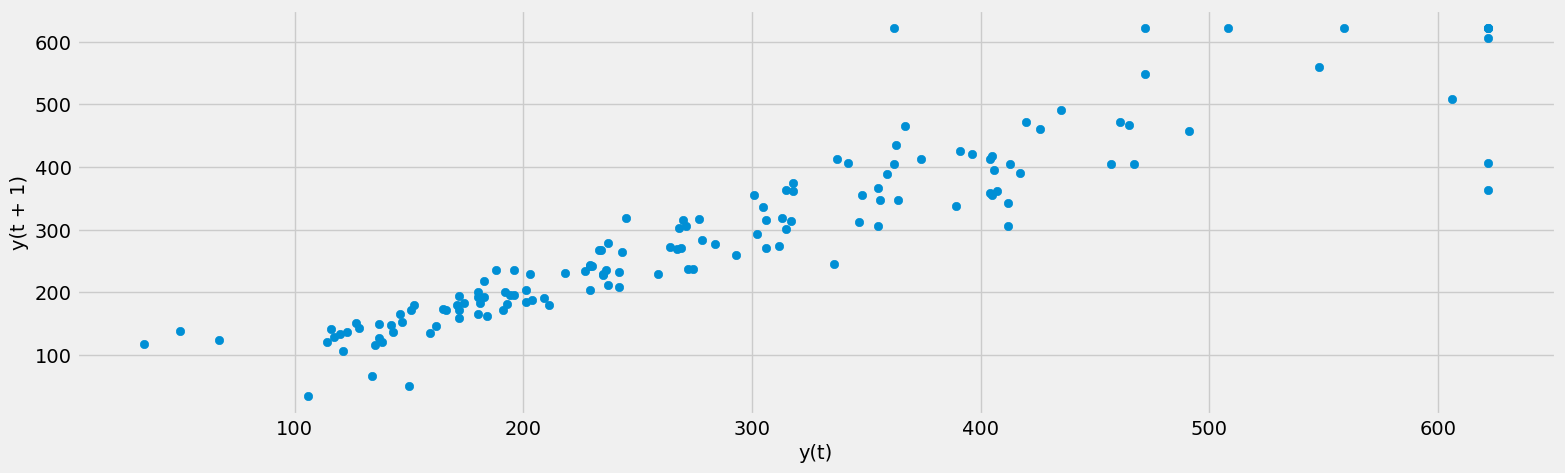

In [89]:
from pandas.plotting import lag_plot

lag_plot(data["Customers_linear"])

<Axes: title={'center': 'TIME SERIES DATA'}, xlabel='Date'>

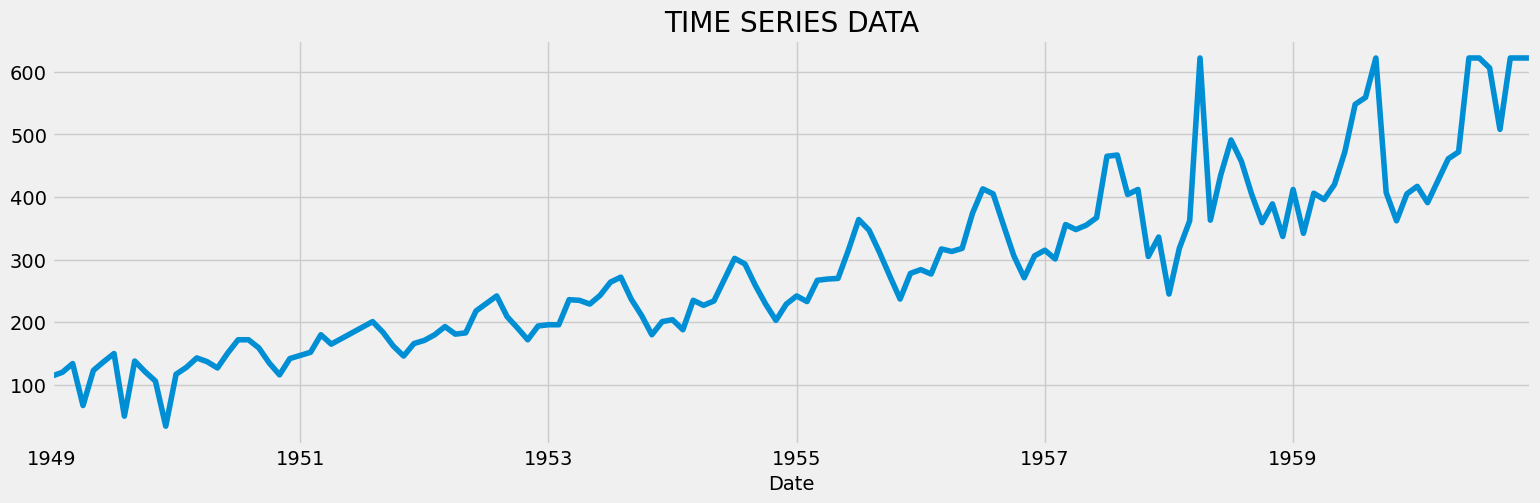

In [90]:
data['Customers_linear'].plot(title = "TIME SERIES DATA")

## Differencing 

<Axes: title={'center': 'FIRST DIFFERENCE DATA'}, xlabel='Date'>

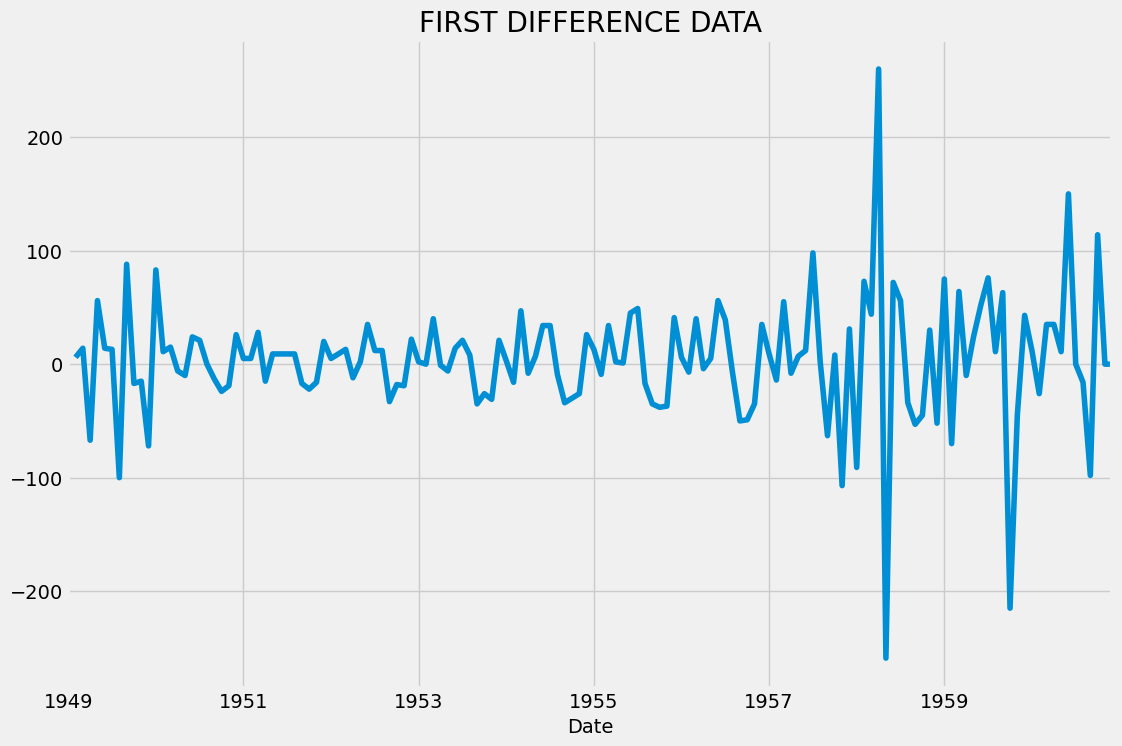

In [91]:
from statsmodels.tsa.statespace.tools import diff

data["d1"] = diff(data["Customers_linear"], k_diff=1)

data["d1"].plot(title = "FIRST DIFFERENCE DATA", figsize = (12,8))

<Axes: title={'center': 'SECOND DIFFERENCE DATA'}, xlabel='Date'>

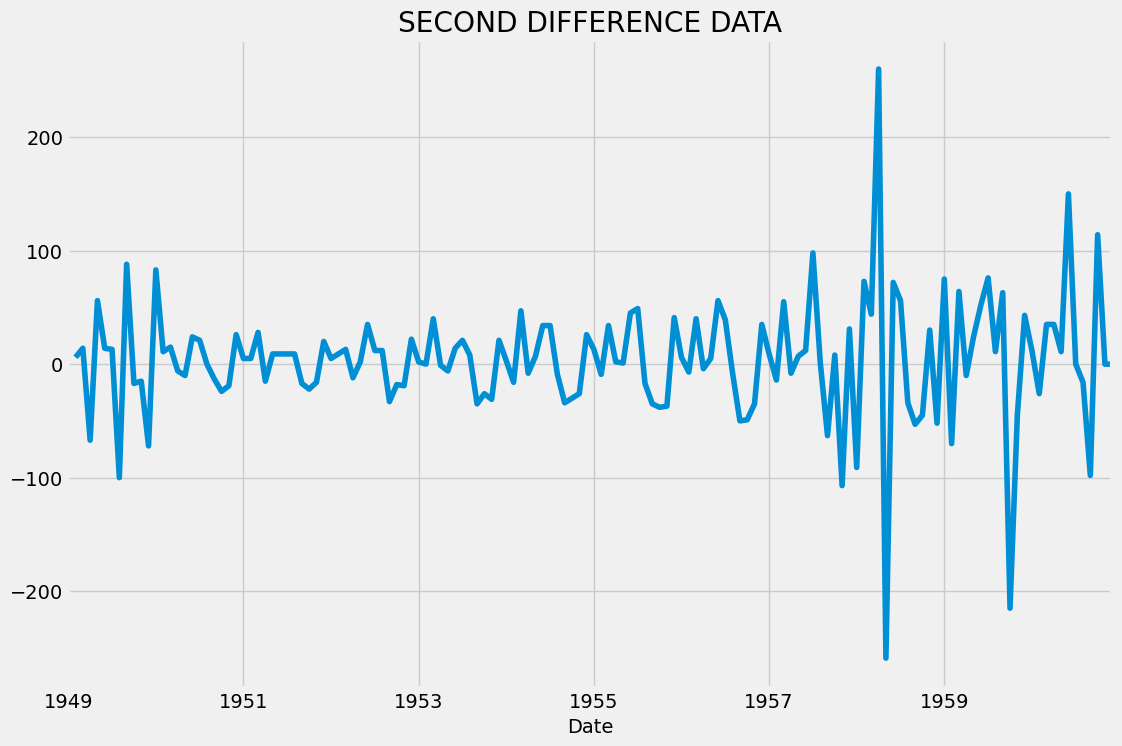

In [92]:
from statsmodels.tsa.statespace.tools import diff

data["d2"] = diff(data["Customers_linear"], k_diff=1)

data["d2"].plot(title = "SECOND DIFFERENCE DATA", figsize = (12,8))

<Axes: title={'center': 'THIRD DIFFERENCE DATA'}, xlabel='Date'>

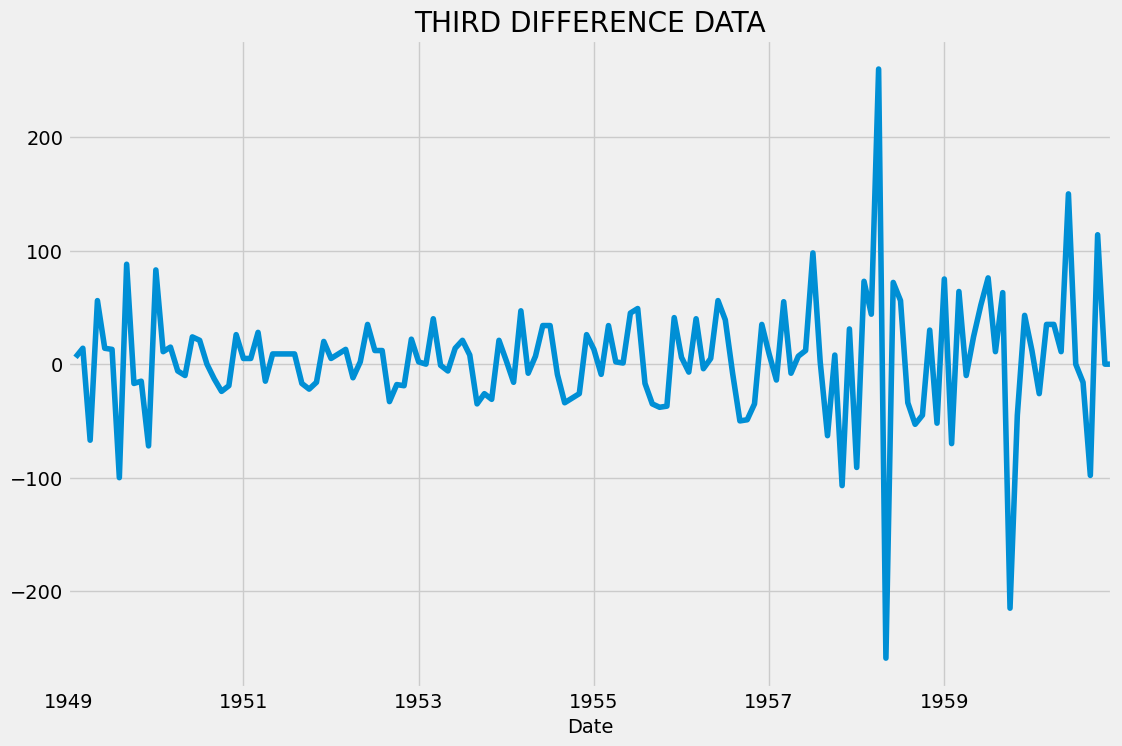

In [93]:
from statsmodels.tsa.statespace.tools import diff

data["d3"] = diff(data["Customers_linear"], k_diff=1)

data["d3"].plot(title = "THIRD DIFFERENCE DATA", figsize = (12,8))

## ACF Plot 

In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

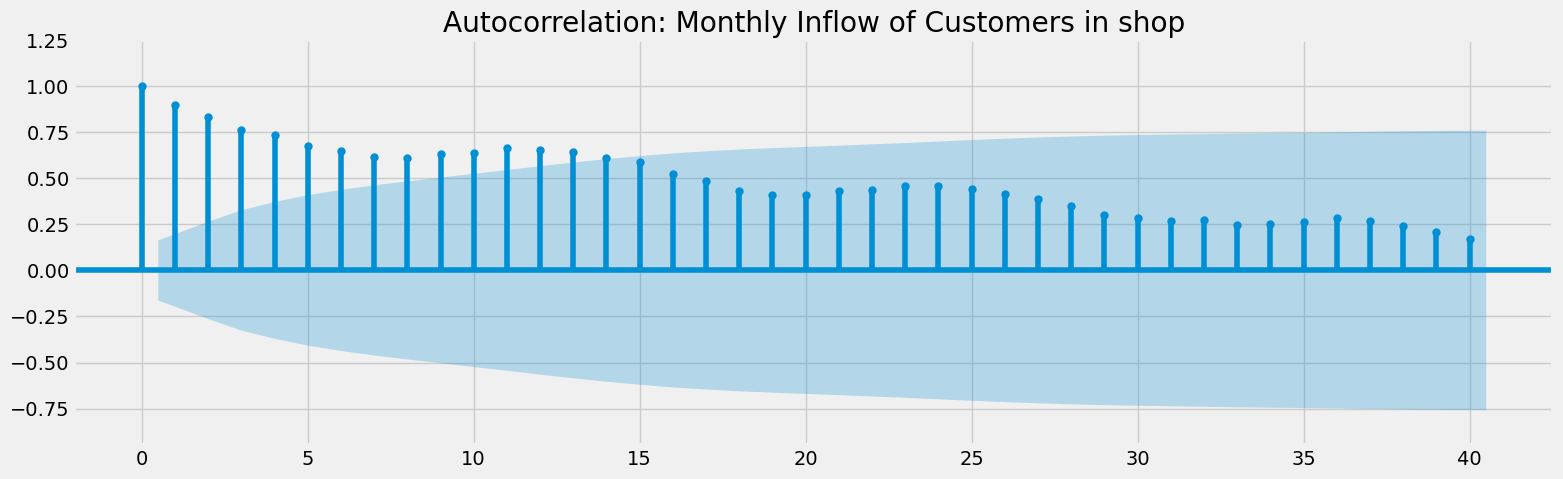

In [95]:
plot_acf(data["Customers_linear"], title="Autocorrelation: Monthly Inflow of Customers in shop", lags = 40, auto_ylims=True);

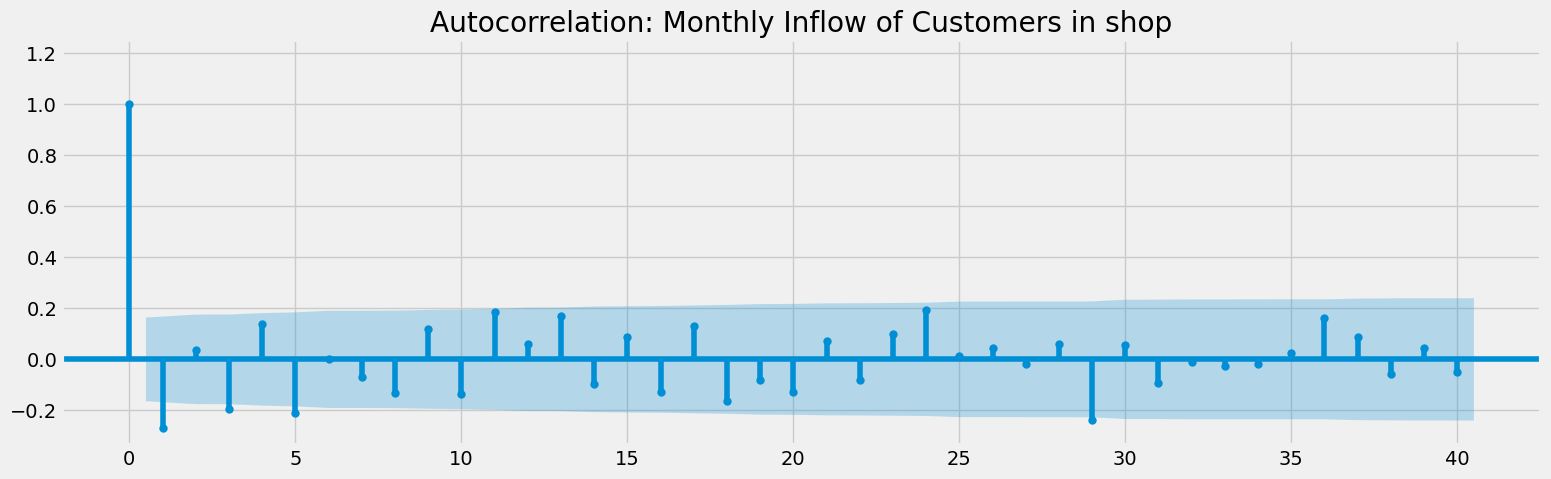

In [96]:
plot_acf(data["d1"].dropna(), title="Autocorrelation: Monthly Inflow of Customers in shop", lags = 40, auto_ylims=True);

## PACF Plots

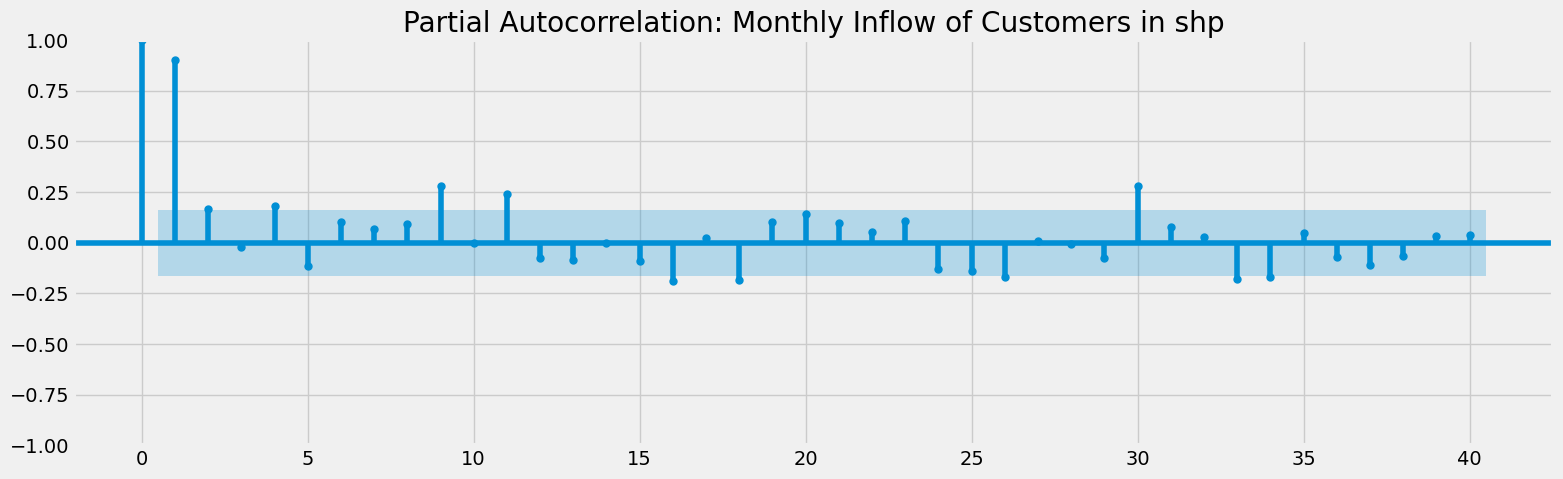

In [97]:
plot_pacf(data["Customers_linear"], title= "Partial Autocorrelation: Monthly Inflow of Customers in shp", lags =40);

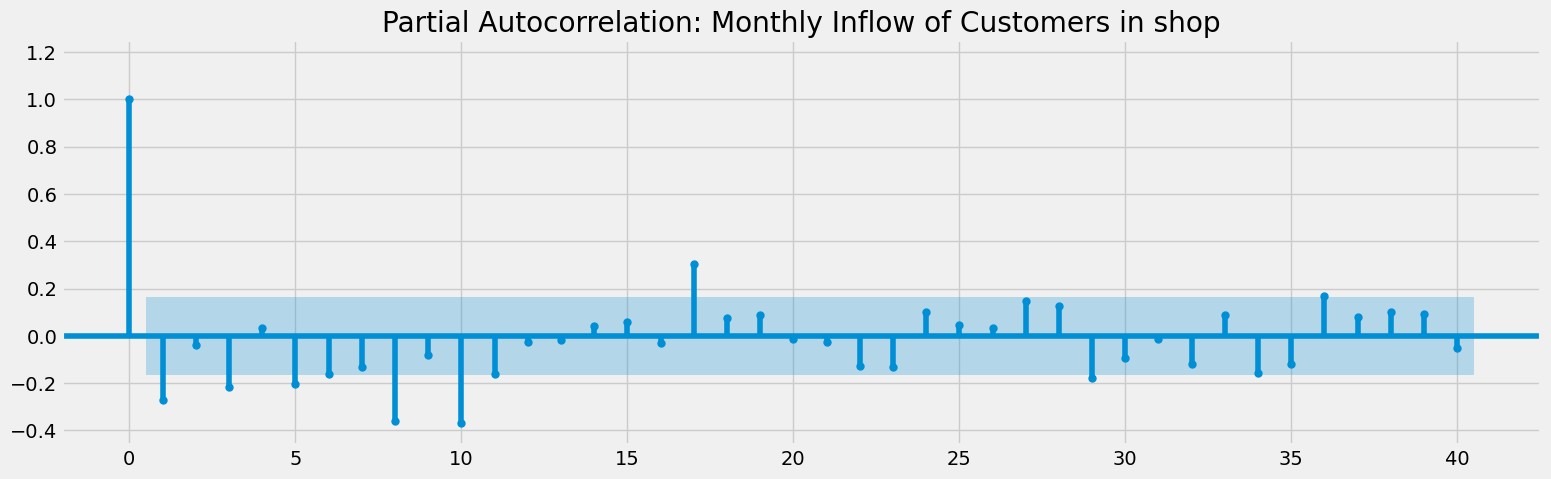

In [98]:
plot_pacf(data["d1"].dropna(), title="Partial Autocorrelation: Monthly Inflow of Customers in shop", lags = 40, auto_ylims=True);

## Lets find out how to get P, D, Q for ARIMA Model

In [99]:
from pmdarima import auto_arima

In [100]:
auto_arima(train["Customers_linear"])

ARIMA(order=(1, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [101]:
auto_arima(train["Customers_linear"]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:               SARIMAX(1, 1, 3)   Log Likelihood                -588.064
Date:                Sat, 01 Jul 2023   AIC                           1186.129
Time:                        23:15:07   BIC                           1199.810
Sample:                    01-01-1949   HQIC                          1191.681
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7939      0.046    -17.238      0.000      -0.884      -0.704
ma.L1          0.6207      0.069      9.056      0.000       0.486       0.755
ma.L2         -0.3929      0.080     -4.937      0.000      -0.549      -0.237
ma.L3         -0.6733      0.070     -9.560      0.000      -0.811      -0.535
sigma2      1735.7404    201.427      8.617      0.000    1340.950    2130.530
===================================================================================
Ljung-Box (L1) (Q):                   1.45   Jarque-Bera (JB):                59.29
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               5.95   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
stepwise_fit = auto_arima(train["Customers_linear"], start_p=0, start_q=0, max_p=6, max_q=6, m=1, seasonal=True,
                         d=None, stepwise=True, trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1215.564, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1205.119, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1202.428, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1214.079, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1201.949, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1197.039, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1204.044, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1198.412, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1198.679, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1201.273, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1205.649, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1196.7

## Building an ARIMA model 

In [103]:
model = ARIMA(train["Customers_linear"], order=(1, 1, 3))
model_fit = model.fit()

C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [104]:
forecast = model_fit.forecast(steps=len(test["Customers_linear"]))

In [105]:
forecast

1958-08-01    585.535460
1958-09-01    404.335091
1958-10-01    464.121315
1958-11-01    416.658196
1958-12-01    454.338242
1959-01-01    424.424787
1959-02-01    448.172497
1959-03-01    429.319652
1959-04-01    444.286558
1959-05-01    432.404623
1959-06-01    441.837460
1959-07-01    434.348914
1959-08-01    440.293925
1959-09-01    435.574297
1959-10-01    439.321118
1959-11-01    436.346590
1959-12-01    438.708010
1960-01-01    436.833324
1960-02-01    438.321600
1960-03-01    437.140087
1960-04-01    438.078068
1960-05-01    437.333423
1960-06-01    437.924582
1960-07-01    437.455272
1960-08-01    437.827848
1960-09-01    437.532067
1960-10-01    437.766882
1960-11-01    437.580467
1960-12-01    437.728458
Freq: MS, Name: predicted_mean, dtype: float64

## Plotting the ARIMA Model 

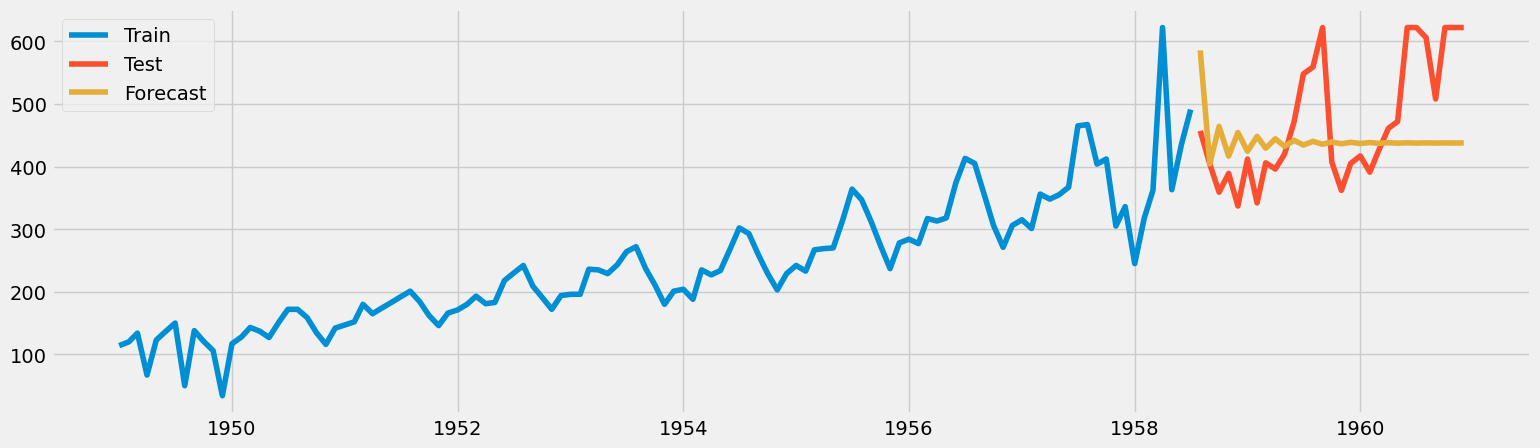

In [106]:
plt.plot(train["Customers_linear"], label = "Train")
plt.plot(test["Customers_linear"], label = "Test")

plt.plot(forecast, label = "Forecast")

plt.legend()

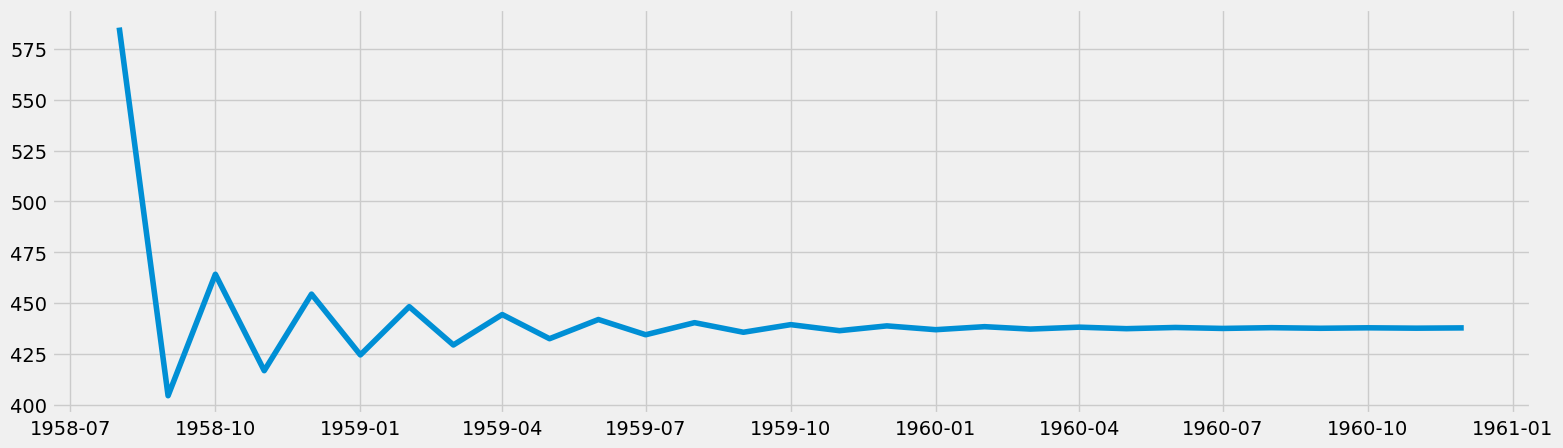

In [107]:
plt.plot(forecast)

#### This captures the trend but not the forecasted model

## Evaluating the ARIMA Model

In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [109]:
mean_absolute_error(test["Customers_linear"], forecast)

85.06846504255402

In [110]:
mean_squared_error(test["Customers_linear"], forecast)

11535.251193109125

In [111]:
np.sqrt(mean_squared_error(test["Customers_linear"], forecast))

107.40228672197405

In [112]:
test["Customers_linear"].describe()

count     29.000000
mean     472.000000
std       99.337448
min      337.000000
25%      404.000000
50%      426.000000
75%      559.000000
max      622.000000
Name: Customers_linear, dtype: float64